# Deck : E-Commerce Segmentation

Background : We have 5 data set that we need to check and our task today are :
1. Importing our dataset to Google Collab
2. Data Cleaning Process (Missing,Duplicate,Outlier,Converting, and Typo)
3. Merge all the data set into one data


In [ ]:
#Library for data cleaning and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() #For changing the looks of matplot lib to seaborn
import plotly.express as px
import plotly.graph_objects as go

from google.colab import drive #Mount Google Drive
drive.mount('/content/drive')
!pip install -q gdown
import gdown


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1 : Cleaning Data

###1. Online Sales Data

In [ ]:
df_sales = pd.read_csv('/content/drive/MyDrive/Market Ecommerce Dataset/Online_Sales.csv')
df_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [ ]:
#Checking raw data
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
#Handling Duplicate Value
df_sales.duplicated().sum()

np.int64(0)

In [ ]:
# Convert Transaction_Date to datetime
df_sales['Transaction_Date'] = pd.to_datetime(df_sales['Transaction_Date'])
df_sales['Month'] = df_sales['Transaction_Date'].dt.strftime('%b')

# Convert Customer_ID and Transaction_ID to string
df_sales['CustomerID'] = (df_sales['CustomerID']).astype(str)
#df_sales['Transaction_ID'] = (df_sales['CustomerID']).astype(str)

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 4.4+ MB


###2. Customer Data

In [ ]:
df_cust = pd.read_excel('/content/drive/MyDrive/Market Ecommerce Dataset/CustomersData.xlsx')
df_cust.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [ ]:
#Checking raw data
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [ ]:
#Handling Duplicate Value
df_cust.duplicated().sum()

np.int64(0)

In [ ]:
#Changing to string
df_cust['CustomerID'] = (df_cust['CustomerID']).astype(str)

df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   object
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


###3. Discount Coupon Data

In [ ]:
df_discount = pd.read_csv('/content/drive/MyDrive/Market Ecommerce Dataset/Discount_Coupon.csv')
df_discount.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
df_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
df_discount.duplicated().sum()

np.int64(0)

###4. Marketing Spend Data###

In [ ]:
df_market = pd.read_csv('/content/drive/MyDrive/Market Ecommerce Dataset/Marketing_Spend.csv')
df_market.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [ ]:
#Checking raw data
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [ ]:
#Handling Duplicate Value
df_market.duplicated().sum()

np.int64(0)

In [ ]:
# Convert Date to datetime
df_market['Date'] = pd.to_datetime(df_market['Date'])

df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


###5. Tax Amount Data

In [ ]:
df_tax = pd.read_excel('/content/drive/MyDrive/Market Ecommerce Dataset/Tax_amount.xlsx')
df_tax.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [ ]:
#Checking raw data
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [ ]:
#Handling Duplicate Value
df_tax.duplicated().sum()

np.int64(0)

#Part 2 : Data Processing

###Merge Data and Revenue Calculation

In [ ]:
merge_1 = pd.merge(df_sales, df_discount, on=['Month', 'Product_Category'], how='left')

merge_2 = pd.merge(merge_1, df_tax, on='Product_Category', how='left')

merge_2['Coupon_Code'].fillna('Not Available', inplace=True)
merge_2['Discount_pct'].fillna(0, inplace=True)
merge_2['Subtotal'] = merge_2['Quantity'] * merge_2['Avg_Price']
merge_2['Discount'] = np.where(merge_2['Coupon_Status'] == 'Used',
                                  ((merge_2['Quantity'] * merge_2['Avg_Price']) * (merge_2['Discount_pct'] / 100)).round(2),
                                  ((merge_2['Quantity'] * merge_2['Avg_Price']) * 0).round(2))
merge_2['Tax'] = np.where(merge_2['Coupon_Status'] == 'Used',
                                  ((merge_2['Quantity'] * merge_2['Avg_Price']) * (1 - merge_2['Discount_pct'] / 100) * merge_2['GST']).round(2),
                                  ((merge_2['Quantity'] * merge_2['Avg_Price']) * merge_2['GST']).round(2))
merge_2['Total_Price'] = merge_2['Subtotal'] - merge_2['Discount'] + merge_2['Tax'] + merge_2['Delivery_Charges'].round(2)

merge_3 = merge_2.merge(df_cust, on='CustomerID', how='left')

merge_4 = merge_3.merge(df_market, left_on='Transaction_Date', right_on='Date', how='left')
merge_4.drop(columns=['Date'], inplace=True)

merge_4

/tmp/ipython-input-153-627805219.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-153-627805219.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Subtotal,Discount,Tax,Total_Price,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,0.10,153.71,15.37,13.83,158.67,M,Chicago,12,4500,2424.50
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,0.10,153.71,15.37,13.83,158.67,M,Chicago,12,4500,2424.50
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,0.10,2.05,0.20,0.18,8.53,M,Chicago,12,4500,2424.50
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,0.18,87.65,0.00,15.78,109.93,M,Chicago,12,4500,2424.50
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,0.18,16.50,1.65,2.67,24.02,M,Chicago,12,4500,2424.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,0.10,121.30,0.00,12.13,139.93,F,New York,45,4000,2058.75
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,0.18,48.92,14.68,6.16,46.90,F,New York,45,4000,2058.75
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,0.10,151.88,45.56,10.63,123.45,F,New York,45,4000,2058.75
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,0.10,402.60,0.00,40.26,449.36,F,California,7,4000,2058.75


In [ ]:
df_trans = merge_4.copy()

In [ ]:
df_trans['Year_Month'] = df_trans['Transaction_Date'].dt.to_period('M').astype(str)

In [ ]:
df_trans['Total_Price'].sum()

np.float64(5397357.010000001)

## 📊 General Summary

🔁 Total Transaction: 52,924 with 25,061 Invoice ID Number

👥 Count Nunique of CustomerID: 1,468

💰 Total Ravenue (after Tax and Discount): USD 5,397,358.74

🧮 Total Quantity Sold 238,033

💸 Total Discount Sale: USD 310,772.46

🧾 Total Collected Tax (GST): USD 480,701.51



##🏆 Top 5 Product_Category
Apparel – 18,126 transactions

Nest-USA – 14,013 transactions

Office – 6,513 transactions

Drinkware – 3,483 transactions

Lifestyle – 3,092 transactions

##🌍 Top 5 Customer Location

1. Chicago – 18,380 transactions

2. California – 16,136 transactions

3. New York – 11,173 transactions

4. New Jersey – 4,503 transactions

5. Washington DC – 2,732 transactions

##🏷️ Coupon Usage

✅ Used: 17,904 transaksi

🟡 Clicked (tidak digunakan): 26,926 transaksi

❌ Not Used: 8,094 transaksi



📈 Marketing Spend Insights

- Offline Spend : Mean: ~2,844 and Min–Max: ~1,200 to 5,000+

- Online Spend : Mean: ~1,906, and Min–Max: ~900 to 3,500+

#Univariate Analysis

###Top 10 Transaction by Customer ID

In [ ]:
top_cust = df_trans.groupby('CustomerID')[['Quantity', 'Total_Price']].sum().sort_values(by='Total_Price', ascending=False).head(10).round(2)
top_cust

,Quantity,Total_Price
CustomerID,,
12748,4869,87200.81
15311,4211,86911.77
14606,3127,66004.43
14911,2232,58317.33
17841,2626,55461.97
17850,1133,40540.18
17337,1448,37935.30
15039,1665,31738.39
13089,927,30682.42


###Top 10 Transaction by Invoice ID

In [ ]:
top_invoice = df_trans.groupby('Transaction_ID')[['Quantity', 'Total_Price']].sum().sort_values(by='Total_Price', ascending=False).head(10).round(2)
top_invoice

,Quantity,Total_Price
Transaction_ID,,
24863,3050,25516.92
24860,1844,21188.00
20374,2000,18373.91
25832,439,18232.28
33036,1388,15680.45
38059,760,14195.10
32526,559,13309.92
36357,1000,12931.65
34429,1258,12371.58


###Top 10 Transaction by Product Category

In [ ]:
top_category = df_trans.groupby('Product_Category')[['Quantity', 'Total_Price']].sum().sort_values(by='Total_Price', ascending=False).reset_index().round(2)
top_category

,Product_Category,Quantity,Total_Price
0,Nest-USA,21430,2721646.38
1,Apparel,32438,827823.97
2,Nest,2837,520655.26
3,Office,88383,381948.25
4,Drinkware,30501,272620.97
5,Bags,15273,193627.04
6,Lifestyle,24881,125274.54
7,Notebooks & Journals,9556,122419.38
8,Nest-Canada,469,76245.75
9,Headgear,3533,57861.12


In [ ]:
fig = px.bar(top_category.sort_values('Total_Price', ascending=False).head(10),
             x='Product_Category', y='Total_Price',
             title='Total Revenue by Product Category',
             labels={'Total_Price': 'Revenue ($)'})
fig.show()

###📊 1. Total Revenue Over Time

In [ ]:
daily_revenue = df_trans.groupby('Transaction_Date')['Total_Price'].sum().reset_index()

fig = px.line(daily_revenue, x='Transaction_Date', y='Total_Price',
              title='Total Revenue Over Time', labels={'Total_Price': 'Total Revenue ($)'})
fig.show()


###📈 2. Revenue vs. Marketing Spend (Scatter)

In [ ]:
daily = df_trans.groupby('Transaction_Date').agg({
    'Total_Price': 'sum',
    'Online_Spend': 'first',
    'Offline_Spend': 'first'
}).reset_index()

daily['Total_Spend'] = daily['Online_Spend'] + daily['Offline_Spend']

daily

,Transaction_Date,Total_Price,Online_Spend,Offline_Spend,Total_Spend
0,2019-01-01,9039.40,2424.50,4500,6924.50
1,2019-01-02,15269.38,3480.36,4500,7980.36
2,2019-01-03,29145.68,1576.38,4500,6076.38
3,2019-01-04,19500.19,2928.55,4500,7428.55
4,2019-01-05,21260.29,4055.30,4500,8555.30
...,...,...,...,...,...
360,2019-12-27,14371.85,3396.87,4000,7396.87
361,2019-12-28,11192.21,3246.84,4000,7246.84
362,2019-12-29,12299.52,2546.58,4000,6546.58
363,2019-12-30,8440.38,674.31,4000,4674.31


In [ ]:
fig = px.scatter(daily, x='Total_Spend', y='Total_Price',
                 title='Revenue vs Total Marketing Spend',
                 labels={'Total_Spend': 'Total Marketing Spend ($)', 'Total_Price': 'Total Revenue ($)'},
                 trendline='ols')
fig.show()

In [ ]:
fig = px.scatter(daily, x='Online_Spend', y='Total_Price',
                 title='Revenue vs Online Marketing Spend',
                 labels={'Online_Spend': 'Online Marketing Spend ($)', 'Total_Price': 'Total Revenue ($)'},
                 trendline='ols')
fig.show()

In [ ]:
fig = px.scatter(daily, x='Offline_Spend', y='Total_Price',
                 title='Revenue vs Offline Marketing Spend',
                 labels={'Offline_Spend': 'Offline Marketing Spend ($)', 'Total_Price': 'Total Revenue ($)'},
                 trendline='ols')
fig.show()

###📅 3. Monthly Revenue Trend

In [ ]:
df_trans['Month'] = df_trans['Transaction_Date'].dt.to_period('M').astype(str)

monthly_revenue = df_trans.groupby('Month')['Total_Price'].sum().reset_index()

fig = px.line(monthly_revenue, x='Month', y='Total_Price',
              title='Monthly Revenue Trend',
              labels={'Total_Price': 'Revenue ($)'})
fig.update_xaxes(type='category')  # Ensure months display in order
fig.show()

###🛒 4. Monthly Quantity Sold

In [ ]:
qty_sold = df_trans.groupby('Month')['Quantity'].sum().reset_index()

fig = px.bar(qty_sold, x='Month', y='Quantity',
             title='Monthly Quantity Sold',
             labels={'Quantity': 'Quantity Sold'})
fig.update_xaxes(type='category')


fig.show()

### 💴5. Add ROI Metrics (Revenue / Marketing Spend)

In [ ]:
# Daily ROI
roi = df_trans.groupby('Transaction_Date').agg({
    'Total_Price': 'sum',
    'Online_Spend': 'first',
    'Offline_Spend': 'first'
}).reset_index()

roi['Online_ROI'] = roi['Total_Price'] / roi['Online_Spend']
roi['Offline_ROI'] = roi['Total_Price'] / roi['Offline_Spend']

# Plot ROI over time
fig = px.line(roi, x='Transaction_Date', y=['Online_ROI', 'Offline_ROI'],
              title='Daily ROI: Revenue per Dollar Spent',
              labels={'value': 'ROI', 'Transaction_Date': 'Date'})
fig.show()


#New Customer and Existing Customer Analysis

In [ ]:
df_trans['Customer_Type'] = np.where(df_trans['Tenure_Months'] <= 12, 'new_cust', 'exist_cust')

In [ ]:
cust_type = df_trans.groupby('Customer_Type').agg(
    Cust_Count = ('CustomerID', 'nunique'))

cust_type


,Cust_Count
Customer_Type,
exist_cust,1141
new_cust,327


In [ ]:
month_cust_type = df_trans.groupby(['Month','Customer_Type']).agg(
    Cust_Count = ('CustomerID', 'nunique'),
).reset_index()

month_cust_type


,Month,Customer_Type,Cust_Count
0,2019-01,exist_cust,170
1,2019-01,new_cust,45
2,2019-02,exist_cust,90
3,2019-02,new_cust,19
4,2019-03,exist_cust,168
5,2019-03,new_cust,40
6,2019-04,exist_cust,179
7,2019-04,new_cust,45
8,2019-05,exist_cust,155
9,2019-05,new_cust,45


In [ ]:
fig = px.bar(
    month_cust_type,
    x='Month',
    y='Cust_Count',
    title='Monthly Customer Count by Type',
    labels={'Month': 'Month', 'Cust_Count': 'Number of Customers'},
    color='Customer_Type',
    barmode='group'
)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_xaxes(type='category')

fig.show()

In [ ]:
all_cust = df_trans.groupby(['Month', 'Customer_Type']).agg(
    Cust_Count=('CustomerID', 'nunique'),
    Revenue_Sum=('Total_Price', 'sum')
).reset_index()

all_cust['Revenue_Sum'] = all_cust['Revenue_Sum'].round(2)
all_cust['Revenue_per_Cust'] = all_cust.apply(
    lambda row: round(row['Revenue_Sum'] / row['Cust_Count'],2) if row['Cust_Count'] > 0 else 0, axis=1)


styled_cust_df = all_cust.style.background_gradient(subset=['Cust_Count', 'Revenue_Sum', 'Revenue_per_Cust'], cmap='Blues').format('{:.2f}', subset=['Revenue_Sum', 'Revenue_per_Cust'])
styled_cust_df

,Month,Customer_Type,Cust_Count,Revenue_Sum,Revenue_per_Cust
0,2019-01,exist_cust,170,352024.76,2070.73
1,2019-01,new_cust,45,142065.71,3157.02
2,2019-02,exist_cust,90,298512.80,3316.81
3,2019-02,new_cust,19,76649.59,4034.19
4,2019-03,exist_cust,168,341473.12,2032.58
5,2019-03,new_cust,40,73684.57,1842.11
6,2019-04,exist_cust,179,407011.44,2273.81
7,2019-04,new_cust,45,70487.02,1566.38
8,2019-05,exist_cust,155,290935.54,1877.00
9,2019-05,new_cust,45,74659.69,1659.10


In [ ]:
fig = px.bar(
    all_cust,
    x='Month',
    y='Revenue_Sum',
    color='Customer_Type',
    barmode='group',
    text='Revenue_Sum',
    labels={'Month': 'Year - Month', 'Revenue_Sum': 'Revenue'},
    title='Revenue: New Customer vs Existing Customer<br>in Jan - Dec 2019',
    category_orders={'Customer_Type': ['exist_cust', 'new_cust']})

fig.update_traces(
    texttemplate='%{y}', textposition='outside', textfont=dict(size=75))

fig.show()


In [ ]:
#Find the highest revenue contributed by each New Customer in February 2019

highest_rpc = df_trans[(df_trans['Month'] == '2019-02') & (df_trans['Customer_Type'] == 'new_cust')].sort_values(by=['CustomerID','Transaction_Date'],ascending=True).reset_index(drop=True)
highest_rpc = highest_rpc.groupby(by=['Month','CustomerID']).agg(purchase_freq=('Transaction_ID','nunique'),
                                                                          qty=('Quantity','sum'),
                                                                      revenue=('Total_Price','sum')).sort_values('revenue', ascending=False).reset_index()
highest_rpc['qty_per_trans'] = round(highest_rpc['qty'] / highest_rpc['purchase_freq'],2)
highest_rpc['revenue_per_qty'] = round(highest_rpc['revenue'] / highest_rpc['qty'],2)
highest_rpc['revenue_per_trans'] = round(highest_rpc['revenue'] / highest_rpc['purchase_freq'],2)

styled_rpc = highest_rpc.style.background_gradient(subset=['revenue', 'qty_per_trans','revenue_per_qty', 'revenue_per_trans'], cmap='Blues').format('{:.2f}', subset=['revenue', 'qty_per_trans','revenue_per_qty', 'revenue_per_trans'])
styled_rpc

,Month,CustomerID,purchase_freq,qty,revenue,qty_per_trans,revenue_per_qty,revenue_per_trans
0,2019-02,15808,37,528,12648.71,14.27,23.96,341.86
1,2019-02,16891,37,372,8894.13,10.05,23.91,240.38
2,2019-02,13081,39,170,8526.03,4.36,50.15,218.62
3,2019-02,12472,37,172,7919.27,4.65,46.04,214.03
4,2019-02,13838,35,185,7088.40,5.29,38.32,202.53
5,2019-02,17967,26,328,5301.32,12.62,16.16,203.90
6,2019-02,14396,24,341,5110.82,14.21,14.99,212.95
7,2019-02,14723,19,146,4103.01,7.68,28.10,215.95
8,2019-02,15867,22,81,3354.21,3.68,41.41,152.46
9,2019-02,17787,20,41,3255.51,2.05,79.40,162.78


#How Discount Playing Role in Company Revenue

In [ ]:
discount_offered = df_trans.groupby('Coupon_Status').agg(
    coupon_disc=('Coupon_Status', lambda x: x.count()),
    revenue_disc=('Total_Price', 'sum')).round(2)

discount_offered['coupon_disc_pct'] = ((discount_offered['coupon_disc'] / discount_offered['coupon_disc'].sum()) * 100).round(2)

discount_offered

,coupon_disc,revenue_disc,coupon_disc_pct
Coupon_Status,,,
Clicked,26926,2925741.53,50.88
Not Used,8094,897320.16,15.29
Used,17904,1574295.32,33.83


In [ ]:
fig = px.pie(discount_offered,
             values='coupon_disc',
             names=discount_offered.index,
             title='Coupon Status Distribution and Total Revenue by Status',
             hole=0.4)
fig.update_traces(textinfo='percent+label', insidetextorientation='radial', sort=False, textposition='outside') # Add textposition='outside'
fig.add_trace(go.Pie(values=discount_offered['revenue_disc'],
                     labels=discount_offered.index,
                     domain={'x': [0.3, 0.7], 'y': [0.3, 0.7]},
                     hole=0.6,
                     textinfo='value',
                     insidetextorientation='tangential',
                     sort=False))
fig.update_layout(title_text="Discount Coupon Status vs Total Revenue")
fig.show()


##Coupon Usage Analysis

Examine how frequently customers use discount coupons and how this affects order amounts. We can compare average order value with and without coupons, or use groupby on Coupon_Status flag.

In [ ]:
cupon_avg = df_trans.groupby('Coupon_Status')['Total_Price'].mean().reset_index()

fig = px.bar(cupon_avg,
             x='Coupon_Status',
             y='Total_Price',
             title='Average Total Price by Coupon Status',
             labels={'Total_Price': 'Average Total Price ($)'},
             color='Coupon_Status')
fig.show()

1. Customers Who ‘Not Use’ Coupons Is Spend the Most
At USD 110.86 revenue for ‘Not Use’, it indicates that the customers or those who purchase without the influence of a discount. These customers are likely buying based on need, brand loyalty, or perceived value, rather than price sensitivity.

2. ‘Use Coupon’ Leads to a Lower Average Sale Amount
At USD 87.93 ‘Use Coupons’ attract price-sensitive customers who may be looking for a deal and are less likely to purchase high items or add extra items to their cart.

3. Clicked’ Customers Show High Purchase Intent and Value
It representing customers who engaged with a coupon but didn't use it, has a very high average sales amount of USD 108.66. And it suggests that the act of *considering* a coupon does not necessarily mean the customer is price-sensitive.


##Revenue Convert Discount

In [ ]:
disc_role = df_trans.groupby('Month').agg(
    revenue_disc=('Total_Price', 'sum'),
    cust_no_discount=('CustomerID', 'nunique'),
    revenue_convert_disc=('Total_Price', lambda x: x[df_trans.loc[x.index, 'Coupon_Status'] == 'Used'].sum()),
    cust_convert_disc=('CustomerID', lambda x: x[df_trans.loc[x.index, 'Coupon_Status'] == 'Used'].nunique()),
    revenue_no_disc=('Total_Price', lambda x: x[df_trans.loc[x.index, 'Discount'] == 0].sum()),
    cust_no_disc=('CustomerID', lambda x: x[df_trans.loc[x.index, 'Discount'] == 0].nunique())
).reset_index()


disc_role['dcr'] = disc_role.apply(
    lambda row: (row['cust_convert_disc'] / row['cust_no_discount'] * 100) if row['cust_no_discount'] > 0 else 0, axis=1)
disc_role['drr_pct'] = disc_role.apply(
    lambda row: (row['revenue_convert_disc'] / row['revenue_disc'] * 100) if row['cust_no_discount'] > 0 else 0, axis=1)


styled_disc = disc_role.style.background_gradient(subset=['revenue_disc', 'cust_no_discount','revenue_convert_disc', 'cust_convert_disc','revenue_no_disc', 'cust_no_disc', 'dcr','drr_pct'], cmap='Blues').format('{:.2f}', subset=['revenue_disc','revenue_convert_disc','revenue_no_disc'])

styled_disc

,Month,revenue_disc,cust_no_discount,revenue_convert_disc,cust_convert_disc,revenue_no_disc,cust_no_disc,dcr,drr_pct
0,2019-01,494090.47,215,150716.53,188,344255.13,206,87.441860,30.503833
1,2019-02,375162.39,109,103898.35,101,272042.95,106,92.660550,27.694234
2,2019-03,415157.69,208,112824.59,192,305869.12,204,92.307692,27.176322
3,2019-04,477498.46,224,152147.87,193,327665.13,209,86.160714,31.863531
4,2019-05,365595.23,200,99442.34,170,267371.75,192,85.000000,27.200120
5,2019-06,360998.47,259,97039.13,234,264548.04,249,90.347490,26.880759
6,2019-07,451878.07,236,137927.47,199,315262.64,219,84.322034,30.523161
7,2019-08,475796.27,300,145621.19,268,330923.43,291,89.333333,30.605786
8,2019-09,396509.88,193,117354.32,171,279317.49,184,88.601036,29.596821
9,2019-10,480767.87,210,148898.18,182,332105.01,203,86.666667,30.970909


In [ ]:
disc_cust = df_trans.groupby('Month').agg(
    customer_received_discount=('CustomerID', 'nunique'),
    customer_claimed_discount=('CustomerID', lambda x: x[df_trans.loc[x.index, 'Coupon_Status'] == 'Used'].nunique()),)

fig = go.Figure(data=[
   go.Bar(name='Customer Received Discount', x=disc_cust.index, y=disc_cust['customer_received_discount'], marker_color='lightblue', text=disc_cust['customer_received_discount'], textposition='outside'),
   go.Bar(name='Customer Claimed Discount Coupon', x=disc_cust.index, y=disc_cust['customer_claimed_discount'], marker_color='darkblue', text=disc_cust['customer_claimed_discount'], textposition='outside')
    ])

fig.update_layout(
    barmode='group',
    title='Customer Received Discount vs Customer Claimed Discount Coupon by Month',
    xaxis_title='Year - Month',
    yaxis_title='Customers Count')

fig.update_xaxes(type='category')

fig.show()

In [ ]:
disc_revenue = df_trans.groupby('Month').agg(
    revenue_received_discount=('Total_Price', 'sum'),
    revenue_claimed_discount=('Total_Price', lambda x: x[df_trans.loc[x.index, 'Coupon_Status'] == 'Used'].sum()))
fig = go.Figure(data=[
    go.Bar(name='Revenue Received Discount', x=disc_revenue.index, y=disc_revenue['revenue_received_discount'].round(2), marker_color='lightblue', text=disc_revenue['revenue_received_discount'].round(2), textposition='outside'),
    go.Bar(name='Revenue Claimed Discount Coupon', x=disc_revenue.index, y=disc_revenue['revenue_claimed_discount'].round(2), marker_color='darkblue', text=disc_revenue['revenue_claimed_discount'].round(2), textposition='outside')
])
fig.update_layout(
    barmode='group',
    title='Revenue Received Discount vs Revenue Claimed Discount Coupon by Month',
    xaxis_title='Year - Month',
    yaxis_title='Total Price')
fig.update_traces(
    textfont=dict(size=1000, color='black', family='Arial'))
fig.update_xaxes(type='category')
fig.show()

In [ ]:
disc_product = df_trans.groupby('Product_Category').agg(
    revenue_disc=('Total_Price', lambda x: x[df_trans.loc[x.index, 'Discount_pct'] > 0].sum()),
    cust_no_discount=('CustomerID', lambda x: x[df_trans.loc[x.index, 'Discount_pct'] > 0].nunique()),
    revenue_convert_disc=('Total_Price', lambda x: x[(df_trans.loc[x.index, 'Coupon_Status'] == 'Used') & (df_trans.loc[x.index, 'Discount_pct'] > 0)].sum()),
    cust_convert_disc=('CustomerID', lambda x: x[(df_trans.loc[x.index, 'Coupon_Status'] == 'Used') & (df_trans.loc[x.index, 'Discount_pct'] > 0)].nunique()),
    revenue_no_disc=('Total_Price', lambda x: x[(df_trans.loc[x.index, 'Discount'] == 0)].sum()),
    cust_no_disc=('CustomerID', lambda x: x[(df_trans.loc[x.index, 'Discount'] == 0)].nunique())
).sort_values('revenue_disc', ascending=False)

disc_product['dcr'] = disc_product.apply(
    lambda row: (row['cust_convert_disc'] / row['cust_no_discount'] * 100) if row['cust_no_discount'] > 0 else 0, axis=1)
disc_product['drr_pct'] = disc_product.apply(
    lambda row: (row['revenue_convert_disc'] / row['revenue_disc'] * 100) if row['revenue_disc'] > 0 else 0, axis=1)

styled_product = disc_product.style.background_gradient(subset=['revenue_disc', 'cust_no_discount', 'revenue_convert_disc','cust_convert_disc','revenue_no_disc','cust_no_disc','dcr','drr_pct'], cmap='Blues').format('{:.2f}',
                                                        subset=['revenue_disc', 'revenue_convert_disc','revenue_no_disc'])
styled_product

,revenue_disc,cust_no_discount,revenue_convert_disc,cust_convert_disc,revenue_no_disc,cust_no_disc,dcr,drr_pct
Product_Category,,,,,,,,
Nest-USA,2721646.38,1260,787467.71,1042,1934178.67,1205,82.698413,28.933506
Apparel,827823.97,1323,240544.25,1118,587279.72,1248,84.504913,29.057415
Nest,520655.26,516,142639.65,333,378015.61,451,64.534884,27.396180
Office,381948.25,1103,120352.50,817,261595.75,986,74.070716,31.510159
Drinkware,272620.97,919,75818.78,589,196802.19,798,64.091404,27.811059
Bags,193627.04,728,50423.21,386,143203.83,592,53.021978,26.041409
Lifestyle,125274.54,817,41788.27,531,83486.27,707,64.993880,33.357353
Notebooks & Journals,122419.38,383,33650.07,192,88769.31,300,50.130548,27.487535
Nest-Canada,76245.75,205,19474.80,84,56770.95,156,40.975610,25.542145


In [ ]:
disc_prod = df_trans.groupby('Product_Category').agg(
    customer_received_discount=('CustomerID', 'nunique'),
    customer_claimed_discount=('CustomerID', lambda x: x[df_trans.loc[x.index, 'Coupon_Status'] == 'Used'].nunique()))

fig = go.Figure(data=[
    go.Bar(name='Customer Received Discount', x=disc_prod.index, y=disc_prod['customer_received_discount'], marker_color='lightblue', text=disc_prod['customer_received_discount'], textposition='outside'),
    go.Bar(name='Customer Claimed Discount Coupon', x=disc_prod.index, y=disc_prod['customer_claimed_discount'], marker_color='darkblue', text=disc_prod['customer_claimed_discount'], textposition='outside')])

fig.update_layout(
    barmode='group',
    title='Total Customer Claimed Discount Coupon by Product Category',
    xaxis_title='Product Category',
    yaxis_title='Customer Count')
fig.update_traces(
    textfont=dict(size=12, color='black', family='Arial'))

fig.update_xaxes(type='category')

fig.show()

In [ ]:

top_disc_prod = df_trans.groupby('Product_Category').agg(
    customer_received_discount=('Total_Price', 'sum'),
    customer_claimed_discount=('Total_Price', lambda x: x[df_trans.loc[x.index, 'Coupon_Status'] == 'Used'].sum())).sort_values(by='customer_claimed_discount', ascending=False)
top_disc_prod.head(5)


,customer_received_discount,customer_claimed_discount
Product_Category,,
Nest-USA,2721646.38,787467.71
Apparel,827823.97,240544.25
Nest,520655.26,142639.65
Office,381948.25,120352.50
Drinkware,272620.97,75818.78


In [ ]:
top_disc_prod = df_trans.groupby('Product_Category').agg(
    customer_received_discount=('Total_Price', 'sum'),
    customer_claimed_discount=('Total_Price', lambda x: x[df_trans.loc[x.index, 'Coupon_Status'] == 'Used'].sum())).sort_values(by='customer_claimed_discount', ascending=False).round(2)
top5_disc_prod = top_disc_prod.head(5)

fig = go.Figure(data=[go.Bar(
        name='Customer Received Discount', x=top5_disc_prod.index, y=top5_disc_prod['customer_received_discount'].round(2),marker_color='lightblue',text=top5_disc_prod['customer_received_discount'],textposition='outside'),
    go.Bar(name='Customer Claimed Discount Coupon',x=top5_disc_prod.index,y=top5_disc_prod['customer_claimed_discount'].round(2),marker_color='darkblue',text=top5_disc_prod['customer_claimed_discount'],textposition='outside')])

fig.update_layout(
    barmode='group',
    title='Top 5 Product Categories: Discounted vs Non Discounted Revenue (Jan - Dec 2019)',
    xaxis_title='Product Category',
    yaxis_title='Total Price')

fig.update_traces(textfont=dict(size=12, color='black', family='Arial'))
fig.update_xaxes(type='category')
fig.show()


#Monthly Retention Rate

Retention Rate Analysis

In [ ]:

ret_customers = df_trans.groupby('Year_Month')['CustomerID'].apply(lambda x: set(x.unique()))
sorted_months = sorted(ret_customers.index)

retention_rates = []

for i in range(len(sorted_months) - 1):
    current_month = sorted_months[i]
    next_month = sorted_months[i + 1]

    customers_current = ret_customers[current_month]
    customers_next = ret_customers[next_month]

    retained_customers = len(customers_current.intersection(customers_next))
    total_customers_current = len(customers_current)

    retention_rate = (retained_customers / total_customers_current) * 100 if total_customers_current > 0 else 0

    retention_rates.append({
        'Month': current_month,
        'Cust_Current_Month': total_customers_current,
        'Cust_Retained_Next_Month': retained_customers,
        'Retention_Rate_(%)': round(retention_rate, 2)
    })
df_retention = pd.DataFrame(retention_rates)


print("\nMonthly Retention Rate Overview:")
df_retention



Monthly Retention Rate Overview:


,Month,Cust_Current_Month,Cust_Retained_Next_Month,Retention_Rate_(%)
0,2019-01,215,13,6.05
1,2019-02,109,11,10.09
2,2019-03,208,24,11.54
3,2019-04,224,25,11.16
4,2019-05,200,37,18.50
5,2019-06,259,58,22.39
6,2019-07,236,65,27.54
7,2019-08,300,44,14.67
8,2019-09,193,29,15.03
9,2019-10,210,31,14.76


In [ ]:
fig = px.bar(df_retention,
             x='Month',
             y='Retention_Rate_(%)',
             color='Month',
             title='Monthly Retention Rate (%) Year 2019',
             labels={'Retention_Rate_(%)': 'Retention Rate (%)'})

fig.update_layout(showlegend=False)
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')
fig.update_xaxes(type='category')

fig.show()

#Sales KPI

## Sales KPI on Monthly Basis

In [ ]:
sales_kpi = df_trans.groupby('Month').agg(
    order_number=('Transaction_ID', 'nunique'),
    cust_number=('CustomerID', 'nunique'),
    qty_sold=('Quantity', 'sum'),
    revenue=('Total_Price', 'sum')
).reset_index()

sales_kpi['AOV'] = sales_kpi.apply(
    lambda row: (row['revenue'] / row['order_number']), axis=1)
sales_kpi['ARPU'] = sales_kpi.apply(
    lambda row: (row['revenue'] / row['cust_number']), axis=1)
sales_kpi['ASP'] = sales_kpi.apply(
    lambda row: (row['revenue'] / row['qty_sold']), axis=1)
sales_kpi['basket_size'] = sales_kpi.apply(
    lambda row: (row['qty_sold'] / row['order_number']), axis=1)

styled_kpi = sales_kpi.style.background_gradient(subset=['order_number', 'cust_number', 'qty_sold','revenue','AOV','ARPU','ASP','basket_size'], cmap='Blues').format('{:.2f}', subset=['revenue'])

styled_kpi

,Month,order_number,cust_number,qty_sold,revenue,AOV,ARPU,ASP,basket_size
0,2019-01,2102,215,20140,494090.47,235.057312,2298.095209,24.532794,9.581351
1,2019-02,1664,109,16575,375162.39,225.458167,3441.856789,22.634232,9.960938
2,2019-03,1991,208,20787,415157.69,208.517172,1995.950433,19.971987,10.440482
3,2019-04,1813,224,25277,477498.46,263.374771,2131.689554,18.890630,13.942085
4,2019-05,2034,200,18715,365595.23,179.742001,1827.976150,19.534877,9.201082
5,2019-06,1940,259,21619,360998.47,186.081686,1393.816486,16.698204,11.143814
6,2019-07,2080,236,22898,451878.07,217.249072,1914.737585,19.734390,11.008654
7,2019-08,2414,300,27457,475796.27,197.098703,1585.987567,17.328778,11.374068
8,2019-09,1932,193,19353,396509.88,205.232857,2054.455337,20.488290,10.017081
9,2019-10,2125,210,17425,480767.87,226.243704,2289.370810,27.590696,8.200000


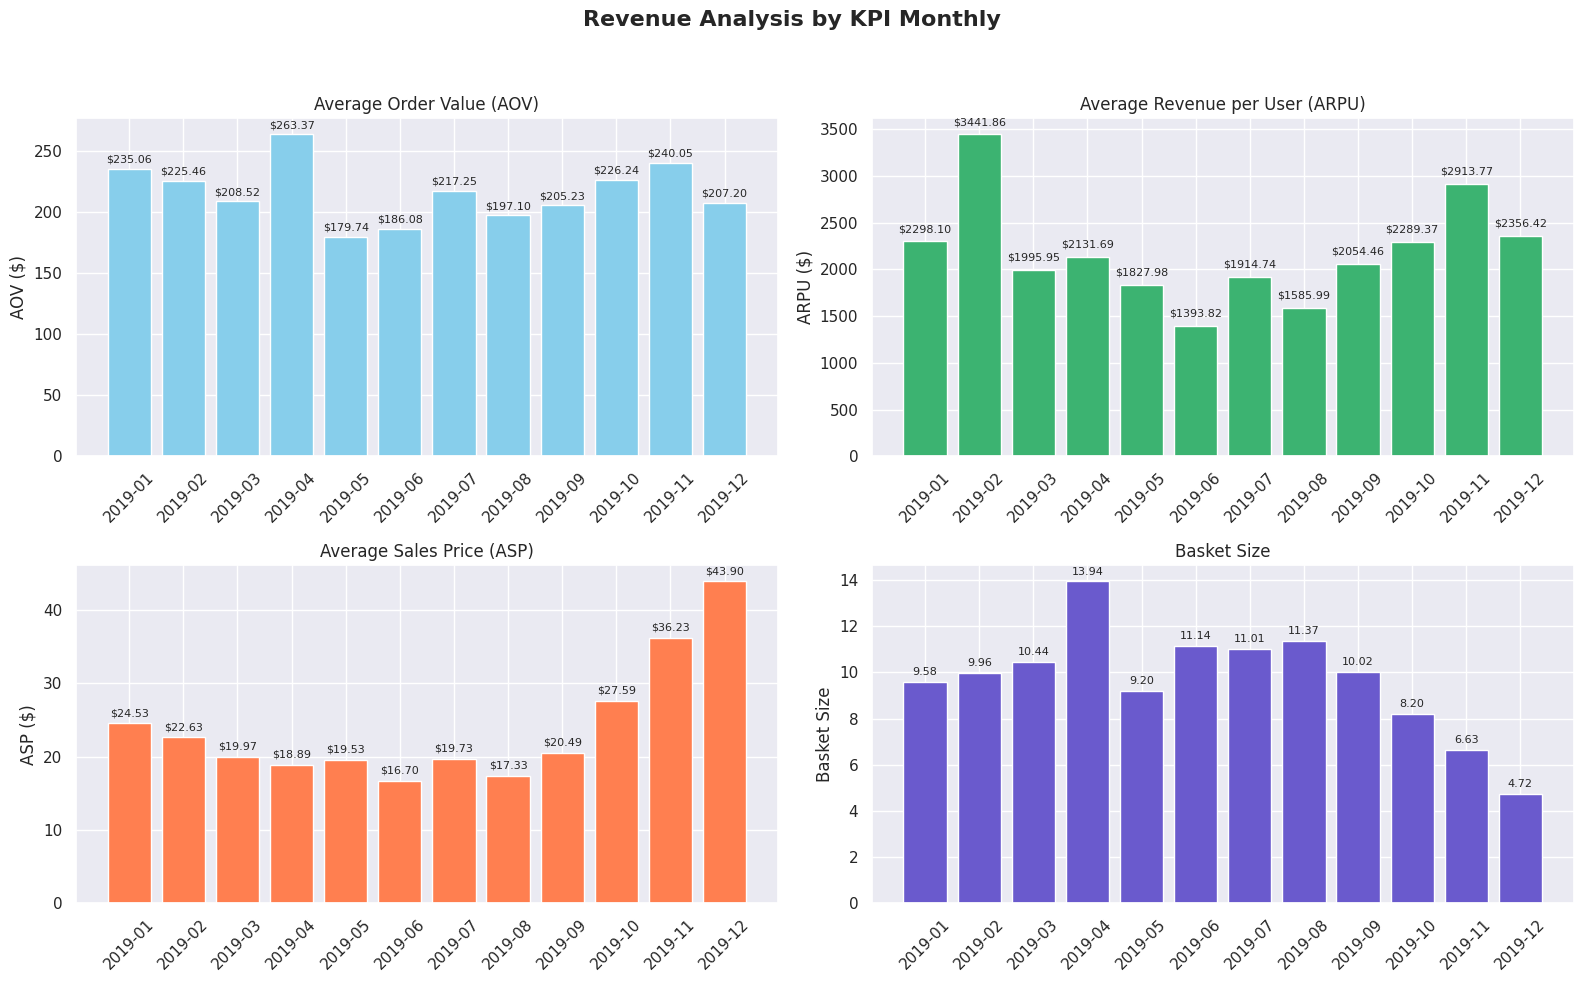

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Revenue Analysis by KPI Monthly', fontsize=16, fontweight='bold')

# ========== 1. AOV ==========
axs[0, 0].bar(sales_kpi['Month'], sales_kpi['AOV'], color='skyblue')
for i, val in enumerate(sales_kpi['AOV']):
    axs[0, 0].text(i, val + 5, f"${val:.2f}", ha='center', fontsize=8)
axs[0, 0].set_title('Average Order Value (AOV)')
axs[0, 0].set_ylabel('AOV ($)')
axs[0, 0].tick_params(axis='x', rotation=45)

# ========== 2. ARPU ==========
axs[0, 1].bar(sales_kpi['Month'], sales_kpi['ARPU'], color='mediumseagreen')
for i, val in enumerate(sales_kpi['ARPU']):
    axs[0, 1].text(i, val + 100, f"${val:.2f}", ha='center', fontsize=8)
axs[0, 1].set_title('Average Revenue per User (ARPU)')
axs[0, 1].set_ylabel('ARPU ($)')
axs[0, 1].tick_params(axis='x', rotation=45)

# ========== 3. ASP ==========
axs[1, 0].bar(sales_kpi['Month'], sales_kpi['ASP'], color='coral')
for i, val in enumerate(sales_kpi['ASP']):
    axs[1, 0].text(i, val + 1, f"${val:.2f}", ha='center', fontsize=8)
axs[1, 0].set_title('Average Sales Price (ASP)')
axs[1, 0].set_ylabel('ASP ($)')
axs[1, 0].tick_params(axis='x', rotation=45)

# ========== 4. Basket Size ==========
axs[1, 1].bar(sales_kpi['Month'], sales_kpi['basket_size'], color='slateblue')
for i, val in enumerate(sales_kpi['basket_size']):
    axs[1, 1].text(i, val + 0.3, f"{val:.2f}", ha='center', fontsize=8)
axs[1, 1].set_title('Basket Size')
axs[1, 1].set_ylabel('Basket Size')
axs[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Sales KPI Base on Product Category

In [ ]:
product_cat = df_trans.groupby('Product_Category').agg(
    order_number=('Transaction_ID', 'nunique'),
    cust_number=('CustomerID', 'nunique'),
    qty_sold=('Quantity', 'sum'),
    revenue=('Total_Price', 'sum')
).sort_values('revenue', ascending=False).reset_index()

product_cat['AOV'] = product_cat.apply(
    lambda row: (row['revenue'] / row['order_number']), axis=1)
product_cat['ARPU'] = product_cat.apply(
    lambda row: (row['revenue'] / row['cust_number']), axis=1)
product_cat['ASP'] = product_cat.apply(
    lambda row: (row['revenue'] / row['qty_sold']), axis=1)
product_cat['basket_size'] = product_cat.apply(
    lambda row: (row['qty_sold'] / row['order_number']), axis=1)

styled_product = product_cat.style.background_gradient(subset=['order_number', 'cust_number', 'qty_sold','revenue','AOV','ARPU','ASP','basket_size'], cmap='Blues').format('{:.2f}',
                                                      subset=['revenue'])
styled_product

,Product_Category,order_number,cust_number,qty_sold,revenue,AOV,ARPU,ASP,basket_size
0,Nest-USA,11626,1260,21430,2721646.38,234.099981,2160.036810,127.001698,1.843282
1,Apparel,8129,1323,32438,827823.97,101.835892,625.717286,25.520191,3.990405
2,Nest,1974,516,2837,520655.26,263.756464,1009.021822,183.523179,1.437183
3,Office,3526,1103,88383,381948.25,108.323383,346.281278,4.321513,25.066081
4,Drinkware,2524,919,30501,272620.97,108.011478,296.649587,8.938099,12.084390
5,Bags,1545,728,15273,193627.04,125.324945,265.971209,12.677735,9.885437
6,Lifestyle,1712,817,24881,125274.54,73.174381,153.334810,5.034948,14.533294
7,Notebooks & Journals,620,383,9556,122419.38,197.450613,319.632846,12.810735,15.412903
8,Nest-Canada,258,205,469,76245.75,295.526163,371.930488,162.570896,1.817829
9,Headgear,674,425,3533,57861.12,85.847359,136.143812,16.377334,5.241840


In [ ]:
top_product_cat = product_cat.head(10)

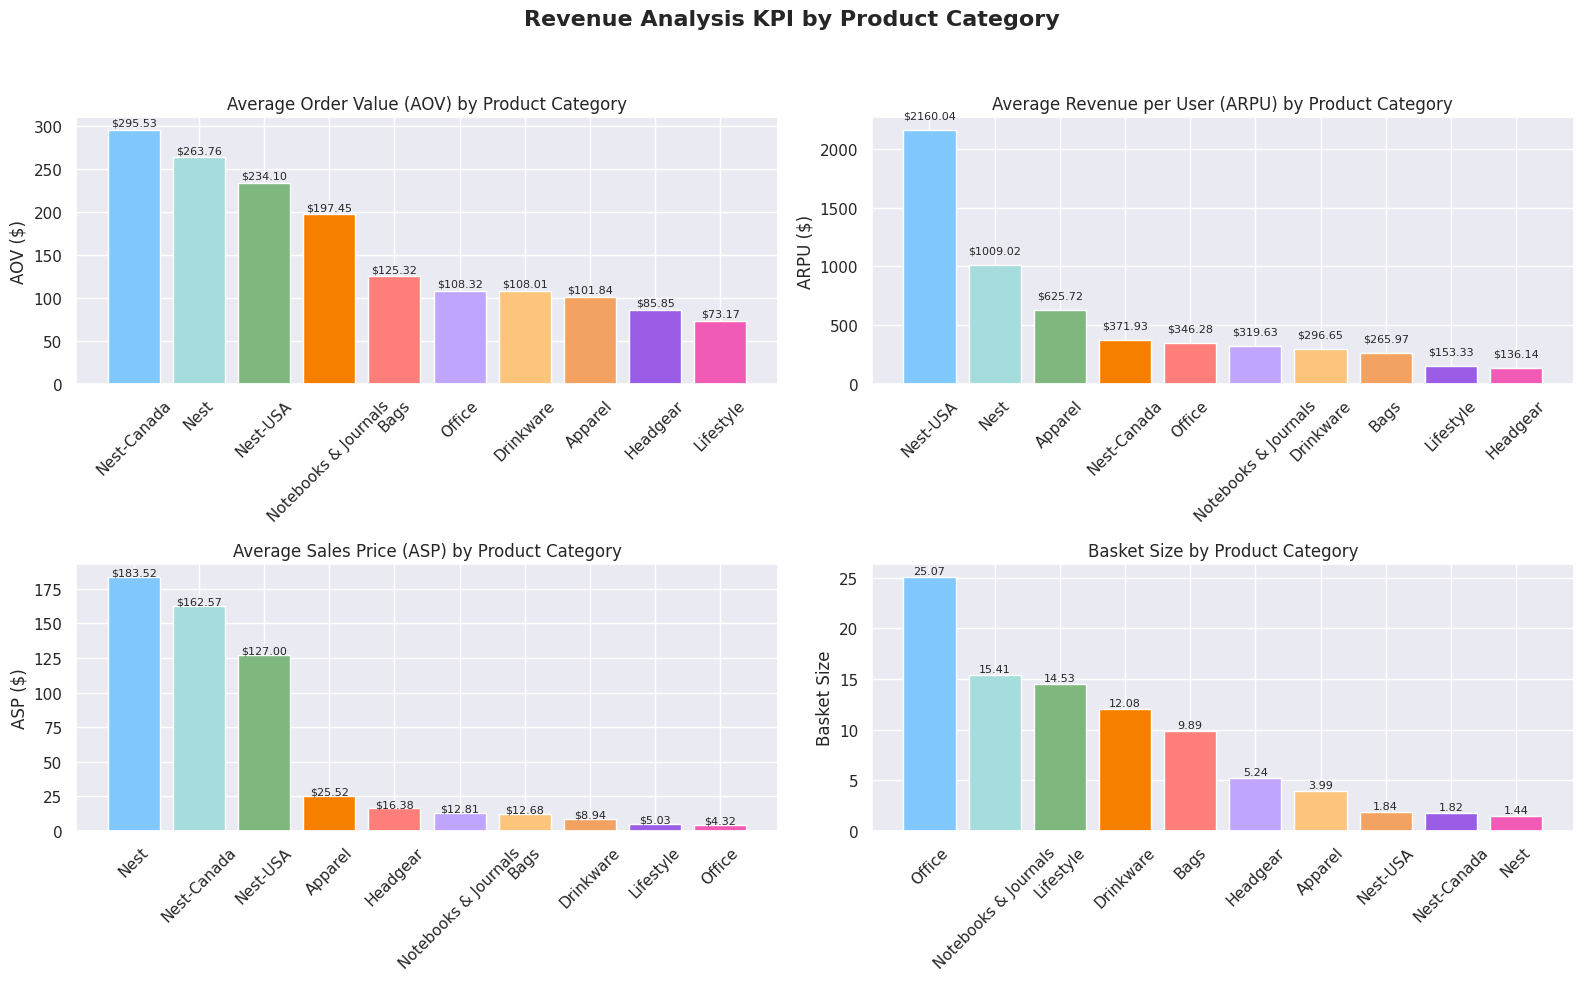

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Revenue Analysis KPI by Product Category', fontsize=16, fontweight='bold')

colors = ['#80c8ff', '#a4dddb', '#7fb77e', '#f77f00', '#ff7e79',
          '#c0a5ff', '#fdc57b', '#f4a261', '#9b5de5', '#f15bb5',
          '#00bbf9', '#ff006e']

# 1. AOV
aov_sorted = top_product_cat.sort_values(by='AOV', ascending=False)
axs[0, 0].bar(aov_sorted['Product_Category'], aov_sorted['AOV'], color=colors[:len(aov_sorted)])
for i, val in enumerate(aov_sorted['AOV']):
    axs[0, 0].text(i, val + 5, f"${val:.2f}", ha='center', fontsize=8)
axs[0, 0].set_title('Average Order Value (AOV) by Product Category')
axs[0, 0].set_ylabel('AOV ($)')
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. ARPU
arpu_sorted = top_product_cat.sort_values(by='ARPU', ascending=False)
axs[0, 1].bar(arpu_sorted['Product_Category'], arpu_sorted['ARPU'], color=colors[:len(arpu_sorted)])
for i, val in enumerate(arpu_sorted['ARPU']):
    axs[0, 1].text(i, val + 100, f"${val:.2f}", ha='center', fontsize=8)
axs[0, 1].set_title('Average Revenue per User (ARPU) by Product Category')
axs[0, 1].set_ylabel('ARPU ($)')
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. ASP
asp_sorted = top_product_cat.sort_values(by='ASP', ascending=False)
axs[1, 0].bar(asp_sorted['Product_Category'], asp_sorted['ASP'], color=colors[:len(asp_sorted)])
for i, val in enumerate(asp_sorted['ASP']):
    axs[1, 0].text(i, val + 1, f"${val:.2f}", ha='center', fontsize=8)
axs[1, 0].set_title('Average Sales Price (ASP) by Product Category')
axs[1, 0].set_ylabel('ASP ($)')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Basket Size
basket_sorted = top_product_cat.sort_values(by='basket_size', ascending=False)
axs[1, 1].bar(basket_sorted['Product_Category'], basket_sorted['basket_size'], color=colors[:len(basket_sorted)])
for i, val in enumerate(basket_sorted['basket_size']):
    axs[1, 1].text(i, val + 0.3, f"{val:.2f}", ha='center', fontsize=8)
axs[1, 1].set_title('Basket Size by Product Category')
axs[1, 1].set_ylabel('Basket Size')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Sales KPI Base on Location in USA

In [ ]:
by_location = df_trans.groupby('Location').agg(
    order_number=('Transaction_ID', 'nunique'),
    cust_number=('CustomerID', 'nunique'),
    qty_sold=('Quantity', 'sum'),
    revenue=('Total_Price', 'sum')
).sort_values('revenue', ascending=False).reset_index()

by_location['AOV'] = by_location.apply(
    lambda row: (row['revenue'] / row['order_number']), axis=1)
by_location['ARPU'] = by_location.apply(
    lambda row: (row['revenue'] / row['cust_number']), axis=1)
by_location['ASP'] = by_location.apply(
    lambda row: (row['revenue'] / row['qty_sold']), axis=1)
by_location['basket_size'] = by_location.apply(
    lambda row: (row['qty_sold'] / row['order_number']), axis=1)

styled_loc = by_location.style.background_gradient(subset=['order_number', 'cust_number', 'qty_sold','revenue','AOV','ARPU', 'basket_size'], cmap='Blues').format('{:.2f}',
                                                    subset=['revenue'])

styled_loc


,Location,order_number,cust_number,qty_sold,revenue,AOV,ARPU,ASP,basket_size
0,Chicago,9090,456,83969,1876540.64,206.440114,4115.220702,22.348017,9.237514
1,California,7890,464,72577,1668590.15,211.481641,3596.099461,22.990619,9.198606
2,New York,5499,324,46507,1089540.96,198.134381,3362.780741,23.427462,8.457356
3,New Jersey,2269,149,22677,467752.57,206.149216,3139.278993,20.626739,9.994271
4,Washington DC,1410,75,12303,294932.69,209.172121,3932.435867,23.972421,8.725532


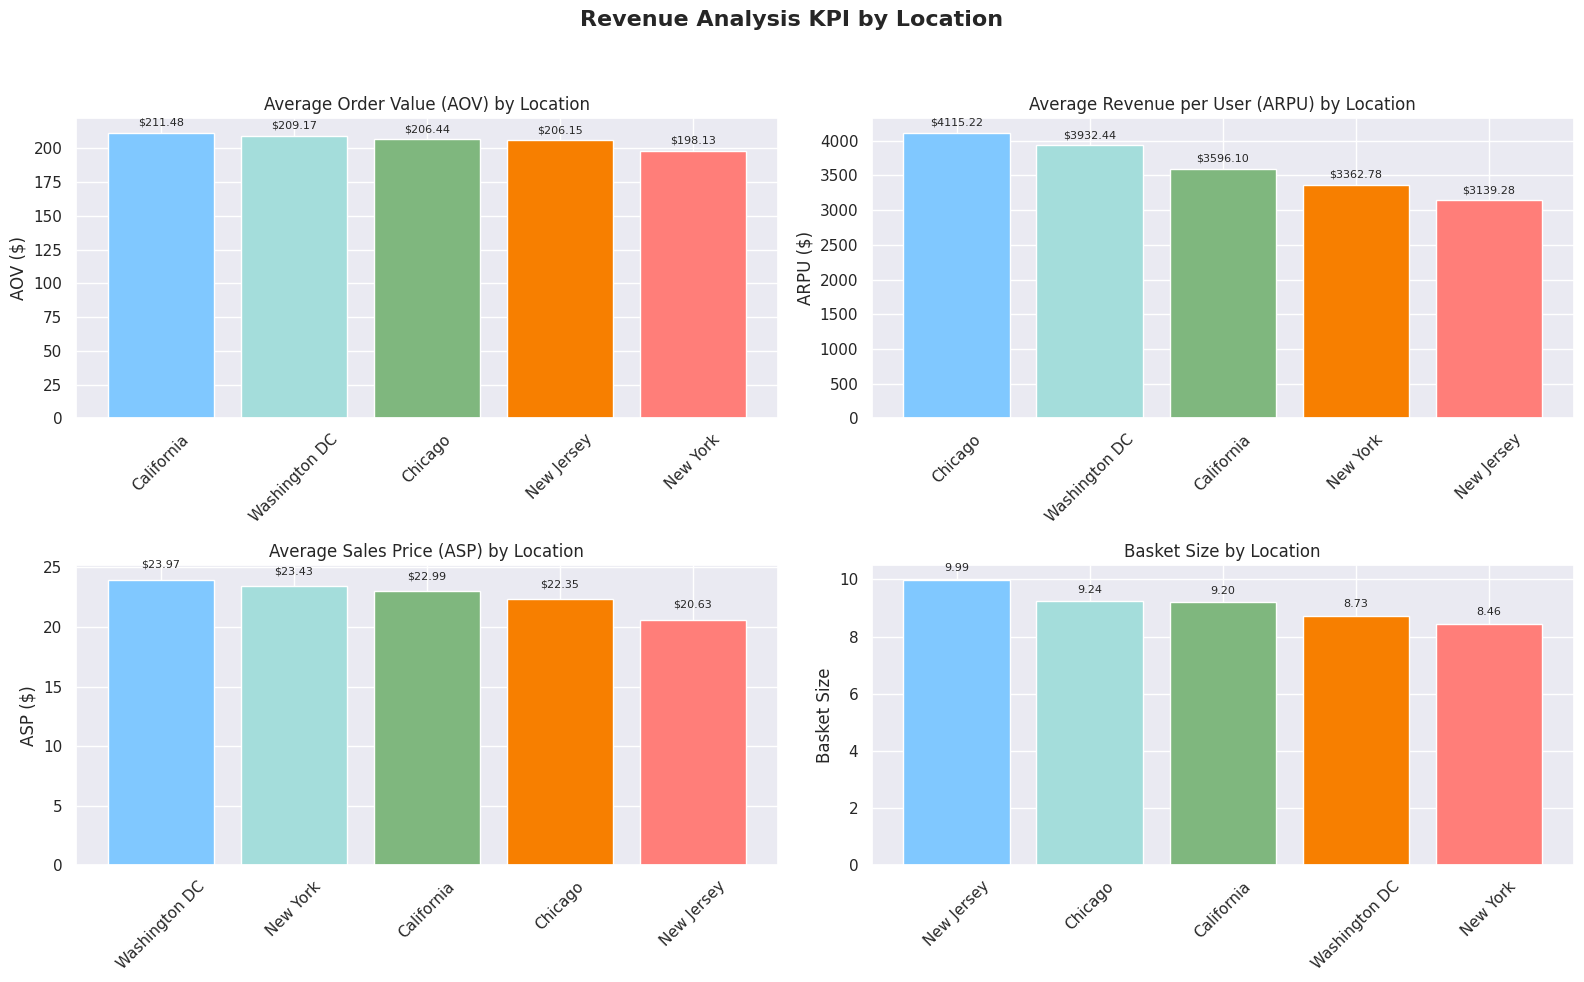

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Revenue Analysis KPI by Location', fontsize=16, fontweight='bold')

colors = ['#80c8ff', '#a4dddb', '#7fb77e', '#f77f00', '#ff7e79',
          '#c0a5ff', '#fdc57b', '#f4a261', '#9b5de5', '#f15bb5',
          '#00bbf9', '#ff006e']

# 1. AOV
aov_sorted = by_location.sort_values(by='AOV', ascending=False)
axs[0, 0].bar(aov_sorted['Location'], aov_sorted['AOV'], color=colors[:len(aov_sorted)])
for i, val in enumerate(aov_sorted['AOV']):
    axs[0, 0].text(i, val + 5, f"${val:.2f}", ha='center', fontsize=8)
axs[0, 0].set_title('Average Order Value (AOV) by Location')
axs[0, 0].set_ylabel('AOV ($)')
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. ARPU
arpu_sorted = by_location.sort_values(by='ARPU', ascending=False)
axs[0, 1].bar(arpu_sorted['Location'], arpu_sorted['ARPU'], color=colors[:len(arpu_sorted)])
for i, val in enumerate(arpu_sorted['ARPU']):
    axs[0, 1].text(i, val + 100, f"${val:.2f}", ha='center', fontsize=8)
axs[0, 1].set_title('Average Revenue per User (ARPU) by Location')
axs[0, 1].set_ylabel('ARPU ($)')
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. ASP
asp_sorted = by_location.sort_values(by='ASP', ascending=False)
axs[1, 0].bar(asp_sorted['Location'], asp_sorted['ASP'], color=colors[:len(asp_sorted)])
for i, val in enumerate(asp_sorted['ASP']):
    axs[1, 0].text(i, val + 1, f"${val:.2f}", ha='center', fontsize=8)
axs[1, 0].set_title('Average Sales Price (ASP) by Location')
axs[1, 0].set_ylabel('ASP ($)')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Basket Size
basket_sorted = by_location.sort_values(by='basket_size', ascending=False)
axs[1, 1].bar(basket_sorted['Location'], basket_sorted['basket_size'], color=colors[:len(basket_sorted)])
for i, val in enumerate(basket_sorted['basket_size']):
    axs[1, 1].text(i, val + 0.3, f"{val:.2f}", ha='center', fontsize=8)
axs[1, 1].set_title('Basket Size by Location')
axs[1, 1].set_ylabel('Basket Size')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Sales Trend Analysis

##Sales Trend Analysis Base on Transaction Count

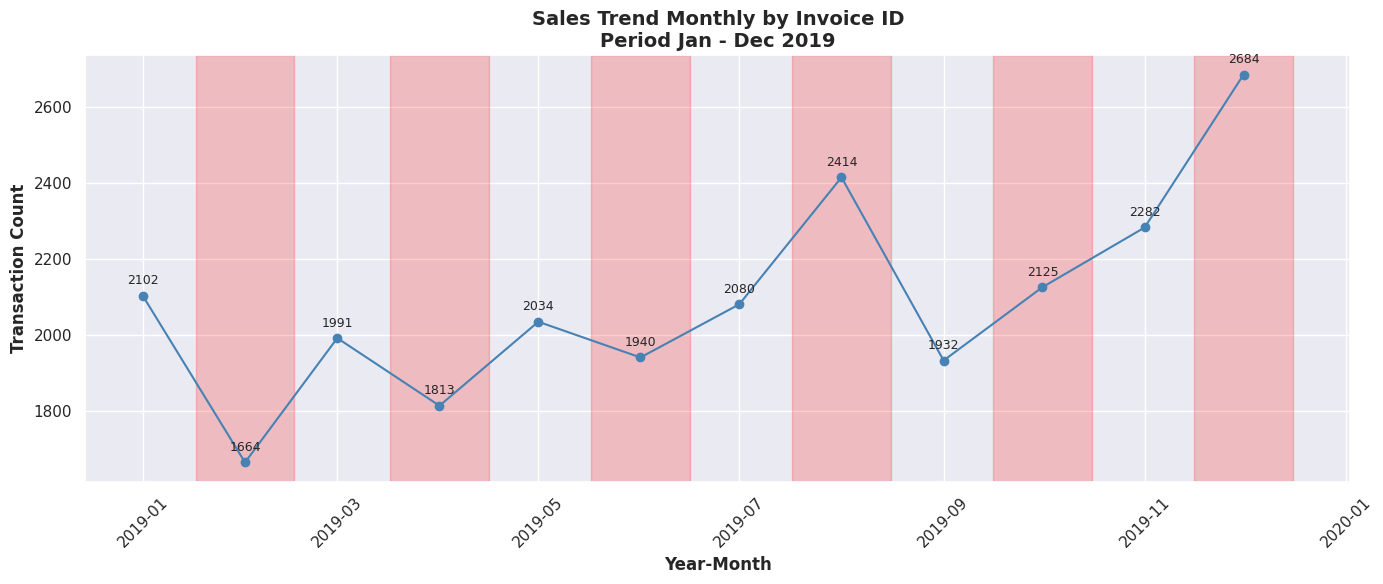

In [ ]:
sales_tren = df_trans.groupby('Year_Month')['Transaction_ID'].nunique().reset_index()
sales_tren.columns = ['Year-Month', 'Transaction_Count']
sales_tren['Year-Month'] = pd.to_datetime(sales_tren['Year-Month'])

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(sales_tren['Year-Month'], sales_tren['Transaction_Count'],
        marker='o', color='steelblue')


for i, val in enumerate(sales_tren['Transaction_Count']):
    ax.text(sales_tren['Year-Month'][i], val + 30, str(val), ha='center', fontsize=9)

for i in range(1, len(sales_tren), 2):
    ax.axvspan(sales_tren['Year-Month'][i] - pd.DateOffset(days=15),
               sales_tren['Year-Month'][i] + pd.DateOffset(days=15),
               color='red', alpha=0.2)

ax.set_title('Sales Trend Monthly by Invoice ID\nPeriod Jan - Dec 2019', fontsize=14, fontweight='bold')
ax.set_xlabel('Year-Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Transaction Count', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


##Sales Trend Analysis Base on Revenue Sales

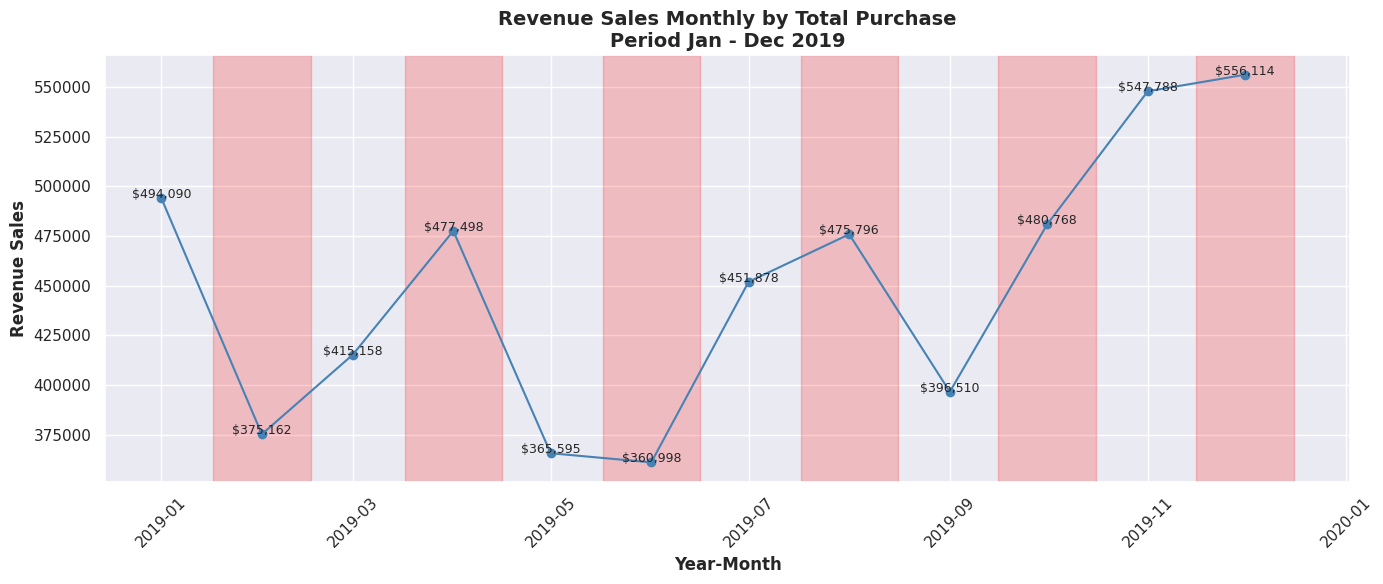

In [ ]:
sales_rev = df_trans.groupby('Year_Month')['Total_Price'].sum().reset_index()
sales_rev.columns = ['Year-Month', 'Total_Price']
sales_rev['Year-Month'] = pd.to_datetime(sales_rev['Year-Month'])

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(sales_rev['Year-Month'], sales_rev['Total_Price'],
        marker='o', color='steelblue')

for i, val in enumerate(sales_rev['Total_Price']):
    ax.text(sales_rev['Year-Month'][i], val + 30, f"${val:,.0f}", ha='center', fontsize=9)

for i in range(1, len(sales_rev), 2):
    ax.axvspan(sales_rev['Year-Month'][i] - pd.DateOffset(days=15),
               sales_rev['Year-Month'][i] + pd.DateOffset(days=15),
               color='red', alpha=0.2)

ax.set_title('Revenue Sales Monthly by Total Purchase\nPeriod Jan - Dec 2019', fontsize=14, fontweight='bold')
ax.set_xlabel('Year-Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Revenue Sales', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


##Sales Trend Analysis Base on Quantity Sold

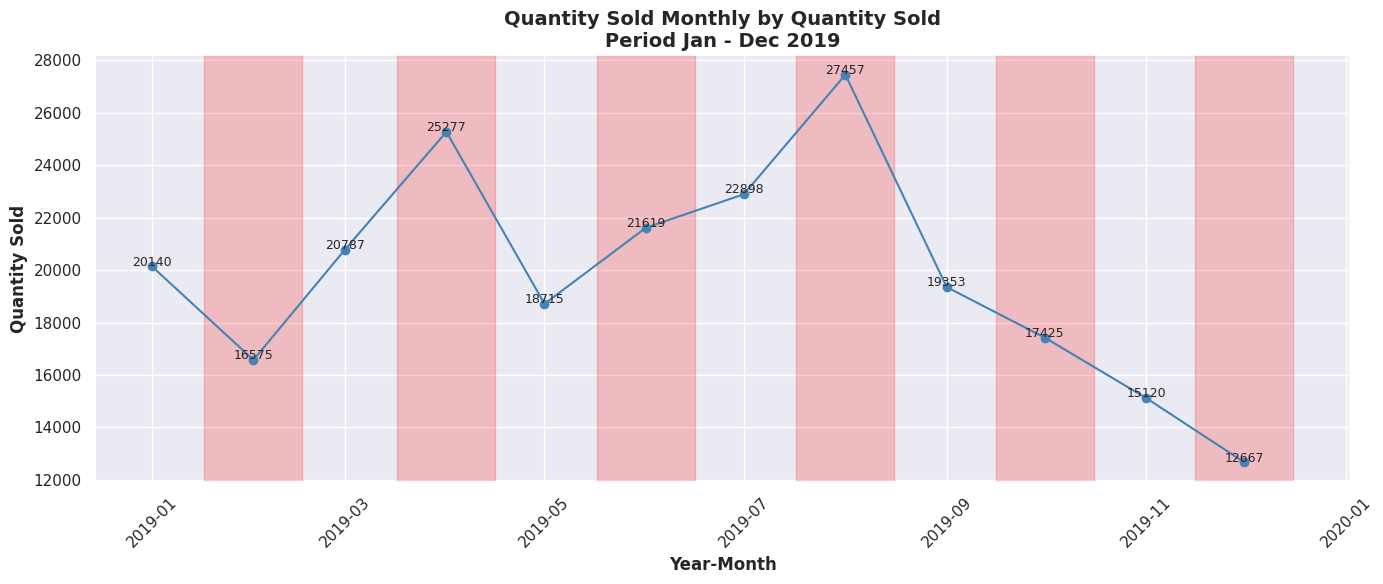

In [ ]:
sales_qty = df_trans.groupby('Year_Month')['Quantity'].sum().reset_index()
sales_qty.columns = ['Year-Month', 'Quantity']
sales_qty['Year-Month'] = pd.to_datetime(sales_rev['Year-Month'])

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(sales_qty['Year-Month'], sales_qty['Quantity'],
        marker='o', color='steelblue')


for i, val in enumerate(sales_qty['Quantity']):
    ax.text(sales_qty['Year-Month'][i], val + 30, str(val), ha='center', fontsize=9)

for i in range(1, len(sales_qty), 2):
    ax.axvspan(sales_qty['Year-Month'][i] - pd.DateOffset(days=15),
               sales_qty['Year-Month'][i] + pd.DateOffset(days=15),
               color='red', alpha=0.2)

ax.set_title('Quantity Sold Monthly by Quantity Sold\nPeriod Jan - Dec 2019', fontsize=14, fontweight='bold')
ax.set_xlabel('Year-Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantity Sold', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


##Sales Trend Analysis From Jan to Dec 2019

In [ ]:
rev_qty = df_trans.groupby('Year_Month')[['Quantity','Total_Price']].sum().reset_index()
rev_qty['ASP'] = rev_qty['Total_Price'] / rev_qty['Quantity']

styled_revqty = rev_qty.style.background_gradient(subset=['Quantity', 'Total_Price', 'ASP'], cmap='Blues').format('{:.2f}',
                                                  subset=['Total_Price'])

styled_revqty

,Year_Month,Quantity,Total_Price,ASP
0,2019-01,20140,494090.47,24.532794
1,2019-02,16575,375162.39,22.634232
2,2019-03,20787,415157.69,19.971987
3,2019-04,25277,477498.46,18.890630
4,2019-05,18715,365595.23,19.534877
5,2019-06,21619,360998.47,16.698204
6,2019-07,22898,451878.07,19.734390
7,2019-08,27457,475796.27,17.328778
8,2019-09,19353,396509.88,20.488290
9,2019-10,17425,480767.87,27.590696


In [ ]:
fig = px.bar(
    rev_qty,
    x='Year_Month',
    y='Total_Price',
    title='Monthly Total Sales and Quantity Sold',
    text='Total_Price')

fig.update_traces(
    texttemplate="$%{text:,.0f}",
    textposition='outside',
    marker_color='lightsteelblue')

fig.add_scatter(
    x=rev_qty['Year_Month'],
    y=rev_qty['Quantity'],
    mode='lines+text',
    yaxis='y2',
    name='Total Quantity',
    line=dict(color='darkblue', width=3),
    text=rev_qty['Quantity'],
    textposition='top center',
    textfont=dict(color='darkblue'))

fig.update_layout(
    yaxis=dict(
        title='Total Sales ($)',
        titlefont=dict(color="#2596be"),
        tickfont=dict(color="#2596be")
    ),
    yaxis2=dict(
        title='Total Quantity Sold',
        titlefont=dict(color="darkblue"),
        tickfont=dict(color="darkblue"),
        overlaying='y',
        side='right'
    ),
    xaxis_title="Month",
    bargap=0.2)

fig.show()


In [ ]:
rev_trx = df_trans.groupby('Year_Month').agg(
        Transaction_Count = ('Transaction_ID', 'nunique'),
        Revenue = ('Total_Price', 'sum')).reset_index()

rev_trx['AOV'] = rev_trx['Revenue'] / rev_trx['Transaction_Count']

styled_revtrx = rev_trx.style.background_gradient(subset=['Transaction_Count', 'Revenue', 'AOV'], cmap='Blues').format('{:.2f}',
                                              subset=['Revenue'])

styled_revtrx

,Year_Month,Transaction_Count,Revenue,AOV
0,2019-01,2102,494090.47,235.057312
1,2019-02,1664,375162.39,225.458167
2,2019-03,1991,415157.69,208.517172
3,2019-04,1813,477498.46,263.374771
4,2019-05,2034,365595.23,179.742001
5,2019-06,1940,360998.47,186.081686
6,2019-07,2080,451878.07,217.249072
7,2019-08,2414,475796.27,197.098703
8,2019-09,1932,396509.88,205.232857
9,2019-10,2125,480767.87,226.243704


In [ ]:
fig = px.bar(
    rev_trx,
    x='Year_Month',
    y='Revenue', # Changed from 'Total_Price' to 'Revenue'
    title='Monthly Total Sales and Total Order',
    text='Revenue') # Changed from 'Total_Price' to 'Revenue'

fig.update_traces(
    texttemplate="$%{text:,.0f}",
    textposition='outside',
    marker_color='lightsteelblue')

fig.add_scatter(
    x=rev_trx['Year_Month'],
    y=rev_trx['Transaction_Count'],
    mode='lines+text',
    yaxis='y2',
    name='Total Transactions',
    line=dict(color='darkblue', width=3),
    text=rev_trx['Transaction_Count'],
    textposition='top center',
    textfont=dict(color='darkblue'))

fig.update_layout(
    yaxis=dict(
        title='Total Sales ($)',
        titlefont=dict(color='#2C6BA9'),
        tickfont=dict(color='#2C6BA9')
    ),
    yaxis2=dict(
        title='Total Transactions',
        titlefont=dict(color="darkblue"),
        tickfont=dict(color="darkblue"),
        overlaying='y',
        side='right'
    ),
    xaxis_title="Month",
    bargap=0.2)

fig.show()

#Tax Impact Analysis

Analyze how different GST tax rates (from Tax_Amount.csv) correlate with sales prices and volumes. Check if higher-tax products have lower sales or average order values.

In [ ]:
df_trans['GST'].value_counts().reset_index()

,GST,count
0,0.18,27343
1,0.10,21314
2,0.05,4145
3,0.12,122


In [ ]:
tax_avg = df_trans.groupby('GST')['Total_Price'].mean().reset_index()

fig = px.bar(tax_avg, x='GST', y='Total_Price',
             title='Average Sales Revenue by GST Rate',
             labels={'Total_Price': 'Avg Total Price ($)', 'GST': 'Tax Percent'})
fig.update_xaxes(type='category')
fig.show()

As the tax percentage increases, the average sale amount decreases significantly, since the data strongly indicates that customers are highly sensitive to GST rates. The significant drop-off in average spending after the 10% tax mark is a critical finding.

**-  Lower Tax Rates Drive Higher-Value Purchases**
The two lowest tax brackets, 5% and 10%  are associated with the highest average sale amounts by a large margin. With average value at USD 176.25 and USD 150.85. This suggests that customers are willing to make much larger purchases when the tax burden is lower.

**-  Clear Divergence in Spending at the 12% and 18% Tax Mark**
The average sale amount plummets from USD 150.85 to just USD 57.72. This is a decrease of over 61% suggests that  12% tax rate may be a psychological barrier for customers, significantly discouraging larger purchases.

**-  Higher Tax Rates are Linked to Low-Value Transactions**
The average sale amount at 12% tax is USD 57.72, and it decreases slightly to USD 52.83 at the 18% tax rate. This indicates that once the tax rate crosses a certain threshold, customers predominantly make smaller, potentially essential-only purchases, and are highly resistant to spending more.



#Marketing Spend Analysis

The Effectiveness Marketing Spend with Revenue

In [ ]:
monthly = df_trans.groupby('Month').agg(
    revenue = ('Total_Price','sum'),
    delivery_chgs = ('Delivery_Charges','sum'))

df_market['Month'] = pd.to_datetime(df_market['Date']).dt.to_period('M')
market_spend = df_market.groupby('Month').agg(
    offline = ('Offline_Spend','sum'),
    online = ('Online_Spend', 'sum'))
market_spend['marketing_spend'] = market_spend['offline'] + market_spend['online']
market_spend['Month'] = market_spend.index.astype(str)
market_spend = market_spend.reset_index(drop=True)

merge1 = monthly.merge(market_spend, on='Month', how='left')
merge1['pct_mkt_rev'] = ((merge1['marketing_spend'] / merge1['revenue']) * 100).round(2)

sum_tax = df_trans.groupby('Month')['Tax'].sum()

merge2 = merge1.merge(sum_tax, on='Month', how='left')
merge2

,Month,revenue,delivery_chgs,offline,online,marketing_spend,pct_mkt_rev,Tax
0,2019-01,494090.47,59242.32,96600,58328.95,154928.95,31.36,44195.40
1,2019-02,375162.39,49216.60,81300,55807.92,137107.92,36.55,34550.30
2,2019-03,415157.69,60799.94,73500,48750.09,122250.09,29.45,38717.50
3,2019-04,477498.46,41481.74,96000,61026.83,157026.83,32.89,47839.73
4,2019-05,365595.23,41396.17,65500,52759.64,118259.64,32.35,35326.58
5,2019-06,360998.47,37513.58,80500,53818.14,134318.14,37.21,34574.09
6,2019-07,451878.07,48723.93,67500,52717.85,120217.85,26.60,42529.34
7,2019-08,475796.27,61099.57,85500,57404.15,142904.15,30.03,41597.81
8,2019-09,396509.88,41005.42,83000,52514.54,135514.54,34.18,34944.98
9,2019-10,480767.87,45961.88,93500,57724.65,151224.65,31.45,38642.88


The highest percentage of Marketing Spend and Revenue occurred in June 2019, reaching an impressive 46.34%. This spike can be attributed to a decrease in Tax costs, which is one of the components used to calculate revenue.

Profit ROI (Net) as of Jan - Dec 2019

In [ ]:
df_market['Month'] = pd.to_datetime(df_market['Date']).dt.to_period('M').astype(str)

marketing_spend = df_market.groupby('Month').agg(
    offline = ('Offline_Spend','sum'),
    online = ('Online_Spend', 'sum')).reset_index()
marketing_spend['marketing_spend'] = marketing_spend['offline'] + marketing_spend['online']

m_rev = df_trans.groupby('Year_Month').agg(
    revenue = ('Total_Price','sum')).reset_index()
m_rev = m_rev.rename(columns={'Year_Month': 'Month'})


merge_m = marketing_spend.merge(m_rev, on='Month', how='left')
merge_m['return_on_investment'] = (((merge_m['revenue'] - merge_m['marketing_spend'])/merge_m['marketing_spend'])* 100).round(2)
merge_m

,Month,offline,online,marketing_spend,revenue,return_on_investment
0,2019-01,96600,58328.95,154928.95,494090.47,218.91
1,2019-02,81300,55807.92,137107.92,375162.39,173.63
2,2019-03,73500,48750.09,122250.09,415157.69,239.60
3,2019-04,96000,61026.83,157026.83,477498.46,204.09
4,2019-05,65500,52759.64,118259.64,365595.23,209.15
5,2019-06,80500,53818.14,134318.14,360998.47,168.76
6,2019-07,67500,52717.85,120217.85,451878.07,275.88
7,2019-08,85500,57404.15,142904.15,475796.27,232.95
8,2019-09,83000,52514.54,135514.54,396509.88,192.60
9,2019-10,93500,57724.65,151224.65,480767.87,217.92


The calculation of ROI (Return on Investment) involves subtracting marketing spend from revenue and then dividing the result by the marketing spend. This calculation yields a ratio that indicates how many times your investment has returned.

A higher ROI is generally more favorable, as it signifies that the company is earning more profit for each dollar spent. The peak ROI occurred in July 2019, reaching an impressive 252.68%. This means that the total marketing spend effectively earned back more than double your investment.



#RFM Anslysis



**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize our marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?


In [ ]:
import datetime as dt
from datetime import datetime

In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Coupon_Code          52924 non-null  object        
 12  Discount_pct         52924 non-null  float64       
 13  GST                  52924 non-

In [ ]:
df_trans.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Discount,Tax,Total_Price,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend,Year_Month,Customer_Type
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,15.37,13.83,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,15.37,13.83,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,0.20,0.18,8.53,M,Chicago,12,4500,2424.5,2019-01,new_cust
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,0.00,15.78,109.93,M,Chicago,12,4500,2424.5,2019-01,new_cust
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,1.65,2.67,24.02,M,Chicago,12,4500,2424.5,2019-01,new_cust


In [ ]:
# Set today’s reference date based on last transaction
today_date = max(df_trans['Transaction_Date']) + dt.timedelta(days=1)

# Convert types
df_trans['CustomerID'] = df_trans['CustomerID'].astype(int)
df_trans['Transaction_Date'] = pd.to_datetime(df_trans['Transaction_Date'])

# Recency
recency_df = df_trans.groupby('CustomerID')['Transaction_Date'].max().reset_index()
recency_df['Recency'] = (today_date - recency_df['Transaction_Date']).dt.days

# Frequency
frequency_df = df_trans.groupby('CustomerID')['Transaction_ID'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Monetary
monetary_df = df_trans.groupby('CustomerID')['Total_Price'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

rfm = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

# Recency score: lower recency = higher score
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency score: higher frequency = higher score
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetary score: higher monetary = higher score
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Convert to integer and sum
rfm['RFM_Score'] = rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].astype(int).sum(axis=1)

def assign_segment(score):
    if score >= 14:
        return 'Premium'
    elif score >= 12:
        return 'Gold'
    elif score >= 10:
        return 'Silver'
    else:
        return 'Standard'

rfm['RFM_Segment'] = rfm['RFM_Score'].apply(assign_segment)

segment_counts = rfm['RFM_Segment'].value_counts()
segment_percent = round((segment_counts / segment_counts.sum()) * 100, 2)

print("Customer Segmentation Distribution:")
print(pd.DataFrame({
    'Segment Count': segment_counts,
    'Percentage': segment_percent
}))


Customer Segmentation Distribution:
             Segment Count  Percentage
RFM_Segment                           
Standard               807       54.97
Silver                 262       17.85
Gold                   226       15.40
Premium                173       11.78


In [ ]:
fig = px.pie(values=segment_percent, names=segment_percent.index, title='Customer Segment Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label', sort=False)
fig.show()

In [ ]:
fig = px.bar(
    segment_counts,
    x=segment_counts.index,
    y=segment_counts.values,
    title='Customer Segmentation Distribution',
    labels={'x': 'Segment', 'y': 'Count of Customer'},
    color=segment_counts.index,
    text=segment_counts.values
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()


**Breakdown of Key Insights:**

1.	The Vast Majority of Customers are 'Standard' with containing 807 customers
This number is more than all other segments combined. This is a classic customer distribution pyramid. It indicates that the bulk of your customer base consists of casual, infrequent, or low-spending buyers. These might be new customers who have only made one purchase or customers who have not bought anything in a long time. Marketing efforts should focus on encouraging a second purchase, increasing engagement, and moving them up to the 'Silver' category. Automated email campaigns or broad-based offers are suitable here.

2.	High-Value Customers are a Small
 The most valuable segments, 'Gold' (226 customers) and 'Premium' (173 customers), are the smallest. This reinforces the Pareto Principle (or 80/20 rule), suggesting that a small percentage of your customers likely drive a large portion of your revenue and profit.
These are your most loyal and highest-spending customers. They should receive personalized attention, exclusive offers, early access to new products, and loyalty rewards. Protecting this small but vital customer base is critical for long-term profitability.

3.	There is a Clear Opportunity to Nurture Mid-Tier Customers with 262 customers
represents a crucial middle ground. These customers are more engaged than the 'Standard' group but have not yet reached the high value of the 'Gold' or 'Premium' segments. Analysis  This group has demonstrated potential. They have likely purchased more than once or spent more than a 'Standard' customer. They are at a critical tipping point where they could either lapse back into the 'Standard' category or be nurtured into the 'Gold' category.
Targeted campaigns aimed at increasing their purchase frequency or average order value can be highly effective. Analyzing their behavior to see what separates them from the 'Gold' segment can provide a clear roadmap for marketing actions.


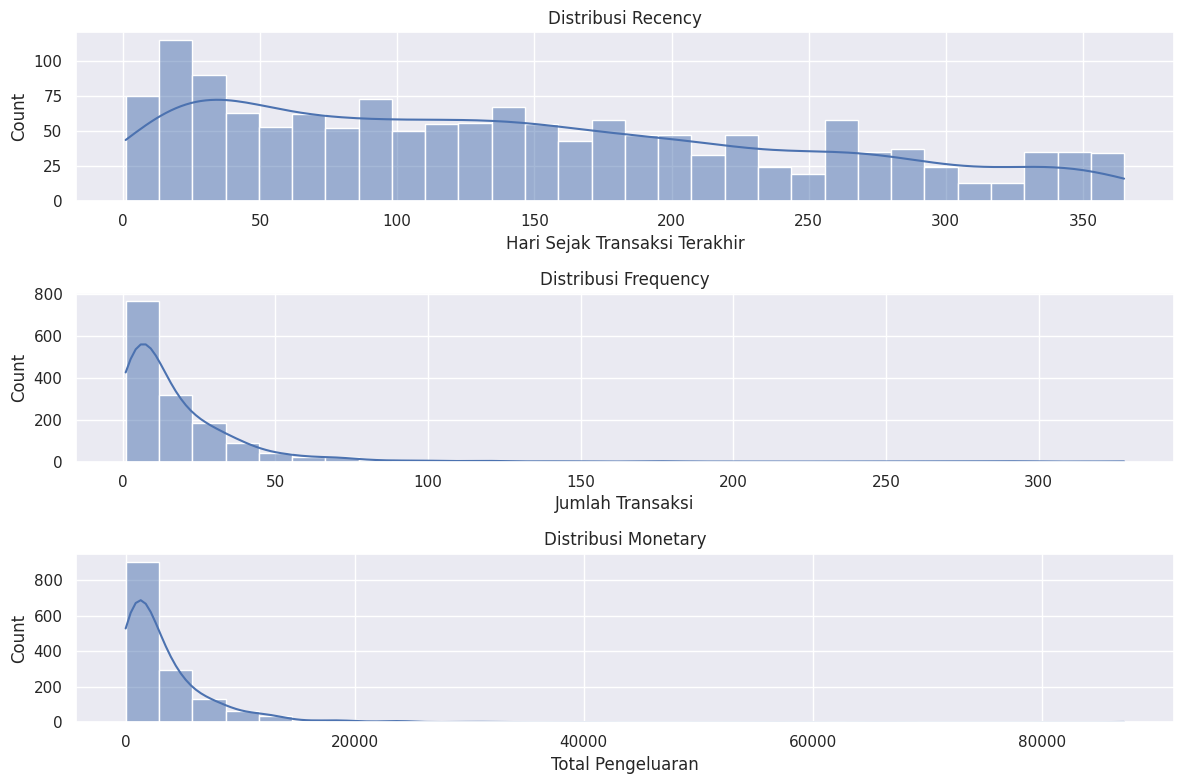

In [ ]:
plt.figure(figsize=(12, 8))

# Recency
plt.subplot(3, 1, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Distribusi Recency')
plt.xlabel('Hari Sejak Transaksi Terakhir')

# Frequency
plt.subplot(3, 1, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Distribusi Frequency')
plt.xlabel('Jumlah Transaksi')

# Monetary
plt.subplot(3, 1, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Distribusi Monetary')
plt.xlabel('Total Pengeluaran')

plt.tight_layout()
plt.show()

In [ ]:
rfm

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment
0,12346,2019-09-15,108,1,174.98,3,1,1,5,Standard
1,12347,2019-11-02,60,31,15686.81,4,5,5,14,Premium
2,12348,2019-10-19,74,8,1689.56,4,2,3,9,Standard
3,12350,2019-12-14,18,11,1467.45,5,3,3,11,Silver
4,12356,2019-09-15,108,13,2007.43,3,3,3,9,Standard
...,...,...,...,...,...,...,...,...,...,...
1463,18259,2019-04-05,271,3,860.68,1,1,2,4,Standard
1464,18260,2019-10-05,88,19,3016.51,4,4,4,12,Gold
1465,18269,2019-06-20,195,2,166.89,2,1,1,4,Standard
1466,18277,2019-10-23,70,1,333.80,4,1,1,6,Standard


##Plot RFM Segments

**segment visualization with Plotly Matplotlib Squarify**

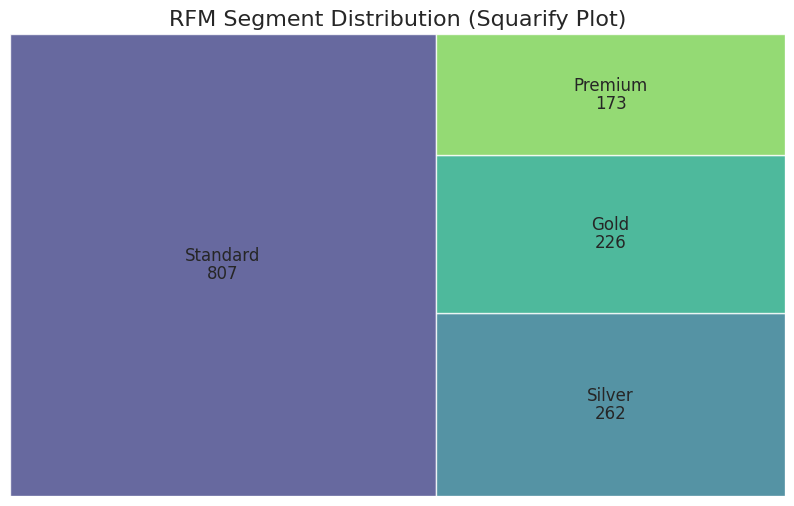

In [ ]:
!pip install -q squarify
import squarify

segment_counts = rfm['RFM_Segment'].value_counts()

plt.figure(figsize=(10, 6))
squarify.plot(sizes=segment_counts.values,
              label=segment_counts.index,
              value=segment_counts.values,
              alpha=.8,
              color=sns.color_palette("viridis", len(segment_counts)))

plt.title('RFM Segment Distribution (Squarify Plot)', fontsize=16)
plt.axis('off')
plt.show()

**Mean Values Interpretation:**

- Recency
  Measures how recently a customer has made a purchase. A lower recency score indicates that a customer has purchased recently, while a higher score means they haven't engaged in a while.

- Frequency
  Reflects how often a customer makes a purchase within a certain time frame. Higher frequency indicates that a customer buys more often.

- Monetary
  Represents the total amount of money a customer spends over a given period. A higher monetary score means the customer contributes more revenue.



In [ ]:
rfm.groupby('RFM_Segment')[['Recency', 'Frequency', 'Monetary']].mean()


,Recency,Frequency,Monetary
RFM_Segment,,,
Gold,80.597345,29.721239,6026.625841
Premium,41.745665,55.508671,12027.198786
Silver,141.141221,19.801527,4001.516298
Standard,186.955390,6.348203,1122.970149


These proportions help you:

- Set realistic targets for Premium segment marketing and resource allocation

- Compare your own customer base distribution to benchmarks

- Plan segmentation strategy: e.g., aiming for a 2–5% Premium share is realistic



In [ ]:
revenue_segment = rfm.groupby('RFM_Segment')['Monetary'].sum().round(2)
revenue_segment = revenue_segment.sort_values(ascending=False)

**Analyzing Revenue Streams Through Customer Segmentation**

This report delves into the comparison of revenue generated from customer segments. By understanding the distinct characteristics and purchasing behaviors of each segment, we can identify opportunities for growth and optimize our marketing strategies.

In [ ]:
fig = px.bar(
    revenue_segment,
    x=revenue_segment.index,
    y=revenue_segment.values,
    title='Comparison of Revenue by Customer Segmentation',
    labels={'x': 'Segment', 'y': 'Revenue'},
    color=revenue_segment.index,
    text=revenue_segment.values
)
fig.update_traces(texttemplate='$%{text:,.2f}', textposition='outside')
fig.update_layout(xaxis_title='RFM Segment', yaxis_title='Total Revenue')
fig.show()


**Breakdown of Key Insights :**

1.	The 'Premium Customer' is the single largest source of revenue, bringing in  USD 2,080,705.39. And the 'Gold Customer' is the second-largest revenue driver at USD 1,362,017.44.Together, the  top two tiers ('Premium' and 'Gold') account for over $3.4 million in revenue. This is a classic illustration of the Pareto Principle (the 80/20 rule), where a small fraction of your customers is responsible for a disproportionately large share of your revenue.  Losing even a few 'Premium' customers would have a much larger negative impact on revenue than losing the same number of 'Standard' customers.

2.	The 'Standard Customer' High in Numbers, Low in Impact.
By customer count (807 customers), contributes the least amount of revenue, at $906,236.91. This 'Standard Customer' consists of low-spenders or infrequent buyers. The marketing goal here is not to invest heavily in retaining every single one, but to find cost-effective ways to "activate" them and identify those with the potential to move into the 'Silver' segment.

3.	The 'Silver Customer ' generates a substantial $1,048,397.27 in revenue.
This segment brings in more revenue than the much larger 'Standard' segment. This highlights that moving a customer from 'Standard' to 'Silver' is a highly profitable endeavor. The customers in this middle tier are already proven to be more valuable than the average customer. The 'Silver Customer ' segment is a key battleground for growth. Investing in targeted marketing to increase their purchase frequency or average order value can yield significant returns and is the most logical pathway to growing your 'Gold' and 'Premium' segments over time.

**"Although Premium Customers make up only 20% of the customer base, they contribute 80% of total revenue — making them extremely valuable."** The Pareto Principle (the 80/20 rule)

# K Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()

In [ ]:
rfm.head()

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment
0,12346,2019-09-15,108,1,174.98,3,1,1,5,Standard
1,12347,2019-11-02,60,31,15686.81,4,5,5,14,Premium
2,12348,2019-10-19,74,8,1689.56,4,2,3,9,Standard
3,12350,2019-12-14,18,11,1467.45,5,3,3,11,Silver
4,12356,2019-09-15,108,13,2007.43,3,3,3,9,Standard


In [ ]:
X = rfm[['RFM_Score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_label = kmeans.fit_predict(X_scaled)
rfm['Predicted_Cluster'] = cluster_label
rfm.head()

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment,Predicted_Cluster
0,12346,2019-09-15,108,1,174.98,3,1,1,5,Standard,0
1,12347,2019-11-02,60,31,15686.81,4,5,5,14,Premium,2
2,12348,2019-10-19,74,8,1689.56,4,2,3,9,Standard,3
3,12350,2019-12-14,18,11,1467.45,5,3,3,11,Silver,1
4,12356,2019-09-15,108,13,2007.43,3,3,3,9,Standard,3


In [ ]:
rfm.groupby('Predicted_Cluster')['CustomerID'].count()

,CustomerID
Predicted_Cluster,
0,399
1,372
2,289
3,408


In [ ]:
rfm.groupby(['Predicted_Cluster','RFM_Segment'])['CustomerID'].count()

Predicted_Cluster  RFM_Segment
0                  Standard       399
1                  Gold           110
                   Silver         262
2                  Gold           116
                   Premium        173
3                  Standard       408
Name: CustomerID, dtype: int64

In [ ]:
fig = px.pie(values=rfm['Predicted_Cluster'].value_counts(), names=rfm['Predicted_Cluster'].value_counts().index, title='Predicter Cluster Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label', sort=False)
fig.show()

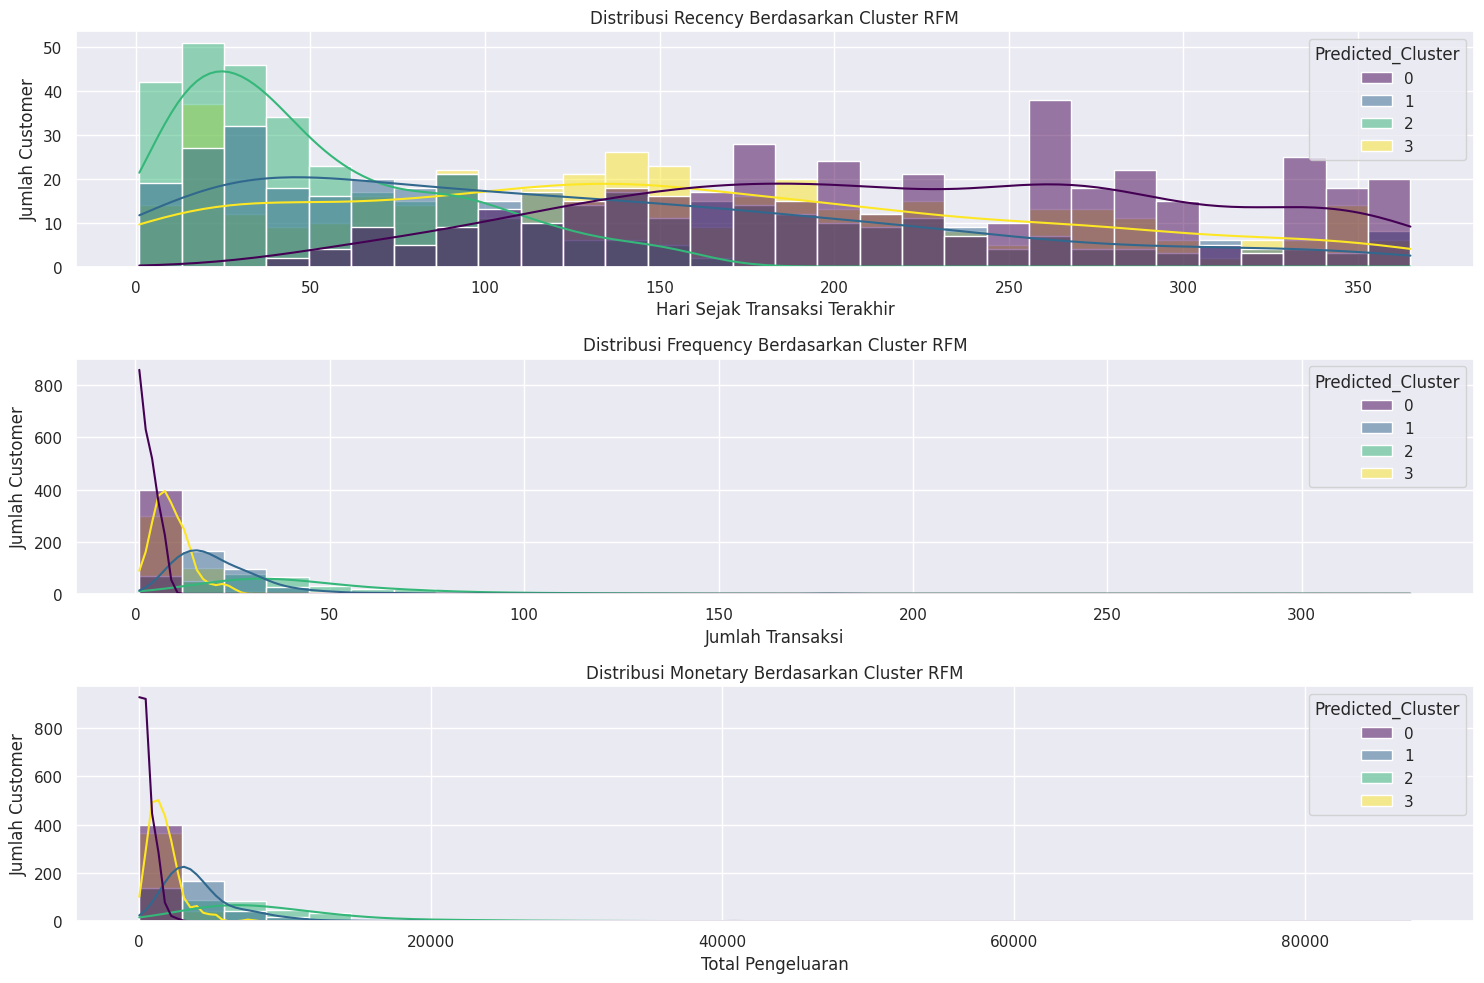


Rata-rata nilai RFM per Cluster:
                   Recency  Frequency  Monetary
Predicted_Cluster                              
0                   221.21       3.42    540.09
1                   127.96      21.53   4313.70
2                    51.27      46.70   9987.62
3                   153.45       9.22   1692.99


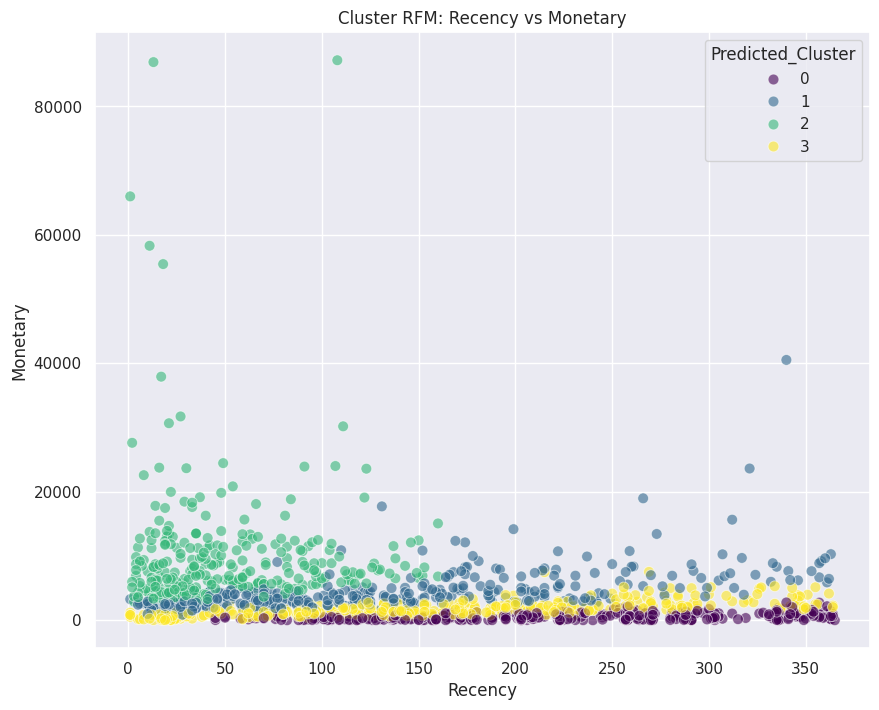

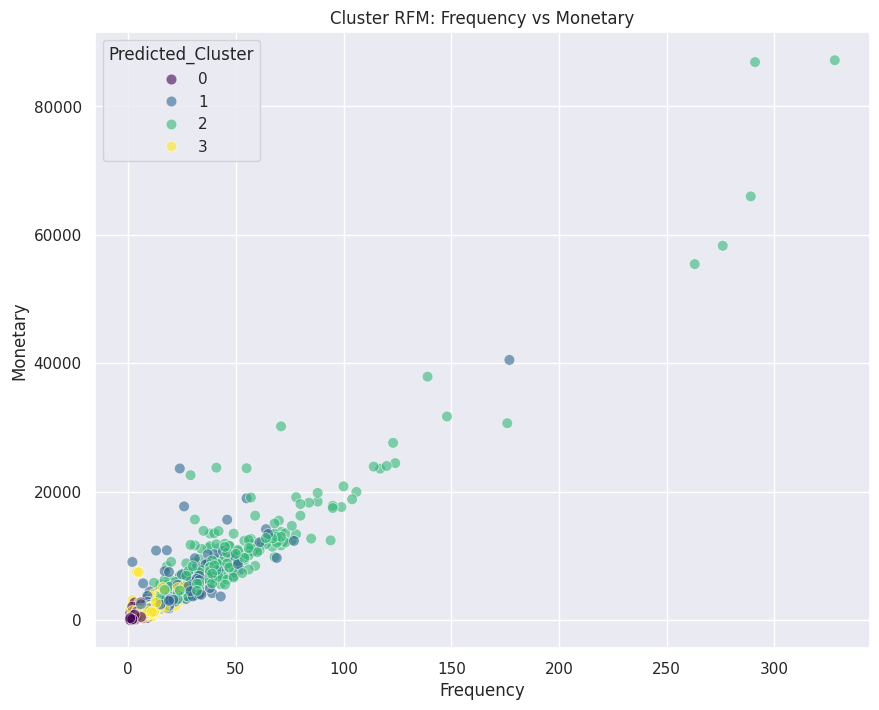

In [ ]:
plt.figure(figsize=(15, 10))

# Plot Recency Distribution by Cluster
plt.subplot(3, 1, 1)
sns.histplot(data=rfm, x='Recency', hue='Predicted_Cluster', kde=True, palette='viridis', bins=30)
plt.title('Distribusi Recency Berdasarkan Cluster RFM')
plt.xlabel('Hari Sejak Transaksi Terakhir')
plt.ylabel('Jumlah Customer')

# Plot Frequency Distribution by Cluster
plt.subplot(3, 1, 2)
sns.histplot(data=rfm, x='Frequency', hue='Predicted_Cluster', kde=True, palette='viridis', bins=30)
plt.title('Distribusi Frequency Berdasarkan Cluster RFM')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Jumlah Customer')

# Plot Monetary Distribution by Cluster
plt.subplot(3, 1, 3)
sns.histplot(data=rfm, x='Monetary', hue='Predicted_Cluster', kde=True, palette='viridis', bins=30)
plt.title('Distribusi Monetary Berdasarkan Cluster RFM')
plt.xlabel('Total Pengeluaran')
plt.ylabel('Jumlah Customer')

plt.tight_layout()
plt.show()

print("\nRata-rata nilai RFM per Cluster:")
print(rfm.groupby('Predicted_Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2))

plt.figure(figsize=(10, 8))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Predicted_Cluster', palette='viridis', s=60, alpha=0.6)
plt.title('Cluster RFM: Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Predicted_Cluster', palette='viridis', s=60, alpha=0.6)
plt.title('Cluster RFM: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()


The Elbow Method

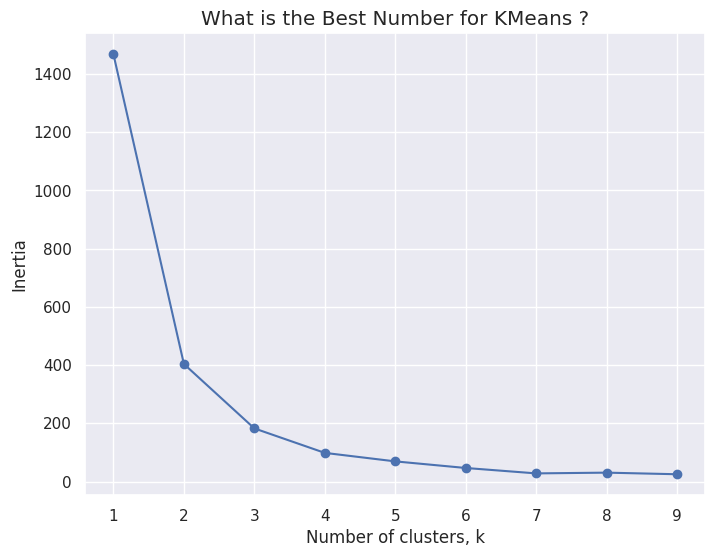

In [ ]:
ks = range(1,10)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=42)
    kc.fit(X_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()



**Conclusion**

- Cluster 0 (Standard Customer)

  This cluster represents customers categorized as **low value** or 'Standard Customers'. They have not made a purchase in a long time (R=2) but have a history of occasional purchases.

- Cluster 1 (Gold Customer)

  This group is identify as 'Gold Customers', characterized by their recent purchases (R=3), frequent buying behavior (F=4), and average spending (M=4).

- Cluster 2 (Premium Customer)

  This cluster identified as **Top value** because consists of our 'Premium Customers', recognized as our best patrons. They have made recent repurchases (R=5), buy frequently (F=5), and exhibit the highest spending levels (M=5).

- Cluster 3 (Silver Customer)

  This cluster is identify as **moderate value** aligns with 'Silver Customers'. While they have not purchased recently (R=2), they previously exhibited frequent buying habits and higher spending.


Implications for Business Strategy:

Premium & Gold Customer : Focus on retention, loyalty programs, and personalized experiences.

Silver Customer: Provide incentives or nurture campaigns to convert them to Gold.

Standard Customer: Use win-back campaigns, but be cautious about over-investing.



In [ ]:
rfm.head()

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment,Predicted_Cluster
0,12346,2019-09-15,108,1,174.98,3,1,1,5,Standard,0
1,12347,2019-11-02,60,31,15686.81,4,5,5,14,Premium,2
2,12348,2019-10-19,74,8,1689.56,4,2,3,9,Standard,3
3,12350,2019-12-14,18,11,1467.45,5,3,3,11,Silver,1
4,12356,2019-09-15,108,13,2007.43,3,3,3,9,Standard,3


##Conclusion


This section compares the customer segmentation labels derived from the RFM (Recency, Frequency, Monetary) analysis with those identified through the K-Means clustering method.



In [ ]:
crosstab_df = pd.crosstab(rfm['Predicted_Cluster'], rfm['RFM_Segment'])
crosstab_df = crosstab_df.reset_index()
melted_df = crosstab_df.melt(id_vars='Predicted_Cluster', var_name='RFM_Segment', value_name='count')
fig = px.bar(melted_df,
             x='Predicted_Cluster',
             y='count',
             color='RFM_Segment',
             barmode='group',
             title='Compare (Predicted_Clusters vs RFM Customer_Clusters)',
             labels={'Predicted_Cluster': 'Clusters & Segments', 'count': 'Counts'})
fig.show()

Overview of the Chart The chart shows the composition of each machine-learning-generated cluster. For each cluster on the x-axis (0, 1, 2, 3), the bars show how many customers from each of the four RFM segments fall into it.

•	The Model Perfectly Isolates for 'Standard Customers’ As the machine learning generate for Clusters 0 and 3
This is a major success for the model. It has learned, on its own, to identify the characteristics of low-value customers (low recency, frequency, and monetary value) and group them together. The fact that it created two separate 'Standard' clusters might even suggest there are two distinct types of low-value customers (e.g., newly acquired vs. long-lapsed), which could be a topic for further investigation. And this validates that the 'Standard' segment is a distinct and homogenous group, and the model is highly effective at identifying them.

•	The Model Successfully Separates High-Value from Mid-Value Customers
The model has created a clear hierarchy of value Cluster 2. It contains the majority of the 'Premium Customers' customers and a portion of the 'Gold customers'. It contains the vast majority of the 'Silver Customers' and the rest of 'Gold Customers'. The algorithm has effectively learned the difference between good customers and the best customers. It recognized that 'Premium' and some 'Gold' customers share behavioral patterns, while 'Silver' and other 'Gold' customers share a different set of patterns. This provides a data-driven confirmation of the value ladder. Marketing can confidently treat customers in Cluster 2 as VIPs and those in Cluster 1 as a high-potential group to nurture.

•	The Model Provides a Nuanced View of the 'Gold Customer' Segment.
RFM segment is the only one that is split across two machine-learning clusters (Cluster 1 and Cluster 2). This is perhaps the most interesting insight. While the RFM rules place all 'Gold' customers in one bucket, the machine learning model sees a difference among them. It suggests that some 'Gold' customers behave more like 'Silver' customers (and are placed in Cluster 1), while others behave more like 'Premium' customers (and are placed in Cluster 2). This provides an opportunity for more sophisticated marketing. Instead of treating all 'Gold' customers the same, you can now tailor your strategy: 'Gold Customer' customers in Cluster 1: Nurture them with offers to increase their spending or frequency, helping them "graduate" to the next level. 'Gold' customers in Cluster 2: Treat them like 'Premium' customers. They are already exhibiting top-tier behavior and should be included in your VIP retention and reward programs.

Summary This chart demonstrates that an unsupervised machine learning model can not only validate a traditional RFM segmentation but also enhance it. It confirms that the RFM segments are meaningful and, more importantly, provides a more nuanced understanding of customer behavior, especially within the crucial 'Gold' segment. This allows for even more precise and e



In [ ]:
rfm.head(5)

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment,Predicted_Cluster
0,12346,2019-09-15,108,1,174.98,3,1,1,5,Standard,0
1,12347,2019-11-02,60,31,15686.81,4,5,5,14,Premium,2
2,12348,2019-10-19,74,8,1689.56,4,2,3,9,Standard,3
3,12350,2019-12-14,18,11,1467.45,5,3,3,11,Silver,1
4,12356,2019-09-15,108,13,2007.43,3,3,3,9,Standard,3


In [ ]:
segment_counts = rfm[rfm['Predicted_Cluster']==0]['RFM_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'count']
fig = px.pie(segment_counts,
             values='count',
             names='RFM_Segment',
             title='Predicted_Clusters_0 Distribution')
fig.show()

In [ ]:
segment_counts = rfm[rfm['Predicted_Cluster']==1]['RFM_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'count']
fig = px.pie(segment_counts,
             values='count',
             names='RFM_Segment',
             title='Predicted_Clusters_1 Distribution')
fig.show()

In [ ]:
segment_counts = rfm[rfm['Predicted_Cluster']==2]['RFM_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'count']
fig = px.pie(segment_counts,
             values='count',
             names='RFM_Segment',
             title='Predicted_Clusters_2 Distribution')
fig.show()

In [ ]:
segment_counts = rfm[rfm['Predicted_Cluster']==3]['RFM_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'count']
fig = px.pie(segment_counts,
             values='count',
             names='RFM_Segment',
             title='Predicted_Clusters_3 Distribution')
fig.show()

#Revenue Category Prediction

**Most eCommerce, wholesale, and retail companies use RFM-based segmentation for Revenue Category Prediction because:**

- It balances current value (Monetary) with engagement and loyalty signals (Recency + Frequency).

- Helps craft targeted marketing:

- Reactivate dormant but valuable customers.

- Reward loyal and recent ones.

- Retain frequent spenders.

Using RFM segments (like Standard, Silver, Gold, Premium) as the target for a predictive model is a very common, logical, and powerful workflow in data science and marketing analytics.

The RFM segments are intuitive and directly tied to business value. It's much easier for marketing teams to understand the goal of "predicting if a customer will be Gold" than a more abstract goal like "predicting a customer's propensity score.
The fact that a machine learning model can accurately predict these segments (as shown in your model comparison table with ~96% accuracy) proves that your RFM rules are capturing real, meaningful differences in customer behavior. In summary, what you have described is not just a common practice; it is a best practice for data-driven customer relationship management. You use historical data to define what "good" looks like (RFM segments) and then use machine learning to predict who will fit that definition in the future.


In [ ]:
rfm

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment,Predicted_Cluster
0,12346,2019-09-15,108,1,174.98,3,1,1,5,Standard,0
1,12347,2019-11-02,60,31,15686.81,4,5,5,14,Premium,2
2,12348,2019-10-19,74,8,1689.56,4,2,3,9,Standard,3
3,12350,2019-12-14,18,11,1467.45,5,3,3,11,Silver,1
4,12356,2019-09-15,108,13,2007.43,3,3,3,9,Standard,3
...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,2019-04-05,271,3,860.68,1,1,2,4,Standard,0
1464,18260,2019-10-05,88,19,3016.51,4,4,4,12,Gold,1
1465,18269,2019-06-20,195,2,166.89,2,1,1,4,Standard,0
1466,18277,2019-10-23,70,1,333.80,4,1,1,6,Standard,0


In [ ]:
customer_segment = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Segment']]
customer_segment.head()

,CustomerID,Recency,Frequency,Monetary,RFM_Segment
0,12346,108,1,174.98,Standard
1,12347,60,31,15686.81,Premium
2,12348,74,8,1689.56,Standard
3,12350,18,11,1467.45,Silver
4,12356,108,13,2007.43,Standard




Label Encoder for Revenue Segment

Standard Customer : **0**

Silver Customer : **1**

Gold Customer : **2**

Premium Customer : **3**


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Adjusted mapping to match actual RFM_Segment values
revenue_segment_mapping = {
    'Standard': 0,
    'Silver': 1,
    'Gold': 2,
    'Premium': 3}

# Apply the mapping
customer_segment['RevenueSegment_Encoded'] = customer_segment['RFM_Segment'].map(revenue_segment_mapping)

# Print the mapping info
print("Mapping of RevenueSegment to Encoded Value:")
print(revenue_segment_mapping)

# Print the updated dataframe
print("\nCustomer Revenue with Encoded RevenueSegment:")
customer_segment.head()


Mapping of RevenueSegment to Encoded Value:
{'Standard': 0, 'Silver': 1, 'Gold': 2, 'Premium': 3}

Customer Revenue with Encoded RevenueSegment:


/tmp/ipython-input-236-849776554.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Recency,Frequency,Monetary,RFM_Segment,RevenueSegment_Encoded
0,12346,108,1,174.98,Standard,0
1,12347,60,31,15686.81,Premium,3
2,12348,74,8,1689.56,Standard,0
3,12350,18,11,1467.45,Silver,1
4,12356,108,13,2007.43,Standard,0


In [ ]:
customer_segment.groupby('RevenueSegment_Encoded')['CustomerID'].count()

,CustomerID
RevenueSegment_Encoded,
0,807
1,262
2,226
3,173


**Steps Outline:**

1. Train-Test Split
Split the data into training and testing sets. It’s crucial to perform the train_test_split before applying any scaling to prevent the model from "seeing" the test set, which can lead to data leakage and inflate model performance unrealistically.

2. Feature Scaling
Apply scaling only to the training data, then transform the test data accordingly to ensure consistency in feature representation.

3. Model Training
Fit the models using the scaled training data to optimize performance.

4. Evaluation
Predict and score the model using the scaled test data to assess its effectiveness.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# The target variable is RevenueSegment_Encoded, with all remaining columns representing the feature set.
X = customer_segment[['Recency', 'Frequency', 'Monetary']]
y = customer_segment['RevenueSegment_Encoded']

In [ ]:
X, y.head()

(      Recency  Frequency  Monetary
 0         108          1    174.98
 1          60         31  15686.81
 2          74          8   1689.56
 3          18         11   1467.45
 4         108         13   2007.43
 ...       ...        ...       ...
 1463      271          3    860.68
 1464       88         19   3016.51
 1465      195          2    166.89
 1466       70          1    333.80
 1467       83         53   7356.88
 
 [1468 rows x 3 columns],
 0    0
 1    3
 2    0
 3    1
 4    0
 Name: RevenueSegment_Encoded, dtype: int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (1174, 3) Y (1174,)
Data Test: X (294, 3) Y (294,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Decistion Tree

In [ ]:
dt_mod = DecisionTreeClassifier(random_state=42)
dt_mod.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_mod.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:','\n\n', report)

Performa Training: 1.0

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       645
           1       1.00      1.00      1.00       210
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       138

    accuracy                           1.00      1174
   macro avg       1.00      1.00      1.00      1174
weighted avg       1.00      1.00      1.00      1174



In [ ]:
y_pred = dt_mod.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.9591836734693877

Classification Report: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.98       162
           1       0.89      0.96      0.93        52
           2       0.91      0.93      0.92        45
           3       0.97      0.91      0.94        35

    accuracy                           0.96       294
   macro avg       0.94      0.95      0.94       294
weighted avg       0.96      0.96      0.96       294



##Random Forest

In [ ]:
rf_mod = RandomForestClassifier(random_state=42)
rf_mod.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_mod.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Training: 1.0

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       645
           1       1.00      1.00      1.00       210
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       138

    accuracy                           1.00      1174
   macro avg       1.00      1.00      1.00      1174
weighted avg       1.00      1.00      1.00      1174



In [ ]:
y_pred = rf_mod.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.9625850340136054

Classification Report: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.98       162
           1       0.91      0.94      0.92        52
           2       0.92      0.98      0.95        45
           3       1.00      0.91      0.96        35

    accuracy                           0.96       294
   macro avg       0.95      0.95      0.95       294
weighted avg       0.96      0.96      0.96       294



##Logistics Regression

In [ ]:
log_mod = LogisticRegression(random_state=42)
log_mod.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = log_mod.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Training: 0.8875638841567292

Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       645
           1       0.80      0.78      0.79       210
           2       0.73      0.76      0.74       181
           3       0.92      0.72      0.81       138

    accuracy                           0.89      1174
   macro avg       0.85      0.82      0.83      1174
weighted avg       0.89      0.89      0.89      1174



In [ ]:
y_pred = log_mod.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.9013605442176871

Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       162
           1       0.91      0.81      0.86        52
           2       0.75      0.87      0.80        45
           3       0.86      0.69      0.76        35

    accuracy                           0.90       294
   macro avg       0.87      0.84      0.85       294
weighted avg       0.90      0.90      0.90       294



##Gaussian Naive Bayes

In [ ]:
gnb_mod = GaussianNB()
gnb_mod.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
y_pred = gnb_mod.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Training: 0.6873935264054515

Classification Report: 

               precision    recall  f1-score   support

           0       0.85      0.95      0.90       645
           1       0.36      0.52      0.42       210
           2       0.28      0.13      0.17       181
           3       0.94      0.43      0.59       138

    accuracy                           0.69      1174
   macro avg       0.61      0.51      0.52      1174
weighted avg       0.69      0.69      0.67      1174



In [ ]:
y_pred = gnb_mod.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.6972789115646258

Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.95      0.92       162
           1       0.40      0.69      0.51        52
           2       0.26      0.13      0.18        45
           3       1.00      0.26      0.41        35

    accuracy                           0.70       294
   macro avg       0.64      0.51      0.50       294
weighted avg       0.72      0.70      0.67       294



##Support Vector Machine (SVM)

In [ ]:
svm_mod = SVC(random_state=42)
svm_mod.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
y_pred = svm_mod.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Training: 0.9267461669505963

Classification Report: 

               precision    recall  f1-score   support

           0       0.97      0.98      0.97       645
           1       0.85      0.83      0.84       210
           2       0.85      0.86      0.85       181
           3       0.95      0.90      0.92       138

    accuracy                           0.93      1174
   macro avg       0.90      0.89      0.90      1174
weighted avg       0.93      0.93      0.93      1174



In [ ]:
y_pred = svm_mod.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.9285714285714286

Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.89      0.81      0.85        52
           2       0.84      0.96      0.90        45
           3       0.97      0.86      0.91        35

    accuracy                           0.93       294
   macro avg       0.92      0.90      0.90       294
weighted avg       0.93      0.93      0.93       294



In [ ]:
#Compile the Model Result

data = {
    'Models': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Gaussian Naive Bayes', 'SVM'],
    'Training Accuracy Score': [1.000000, 1.000000, 0.887563, 0.687393, 0.926746],
    'Testing Accuracy Score': [0.959183, 0.962585, 0.901360, 0.697278, 0.928571]
}

df_mod = pd.DataFrame(data)
df_mod = df_mod.set_index('Models')

styled_mod = df_mod.style.background_gradient(subset=['Training Accuracy Score'], cmap='Blues') \
                    .background_gradient(subset=['Testing Accuracy Score'], cmap='Blues')
styled_mod


,Training Accuracy Score,Testing Accuracy Score
Models,,
Decision Tree,1.000000,0.959183
Random Forest,1.000000,0.962585
Logistic Regression,0.887563,0.901360
Gaussian Naive Bayes,0.687393,0.697278
SVM,0.926746,0.928571


Insert the Random Forest Output to Data Customer

In [ ]:
customer_segment.head()

,CustomerID,Recency,Frequency,Monetary,RFM_Segment,RevenueSegment_Encoded
0,12346,108,1,174.98,Standard,0
1,12347,60,31,15686.81,Premium,3
2,12348,74,8,1689.56,Standard,0
3,12350,18,11,1467.45,Silver,1
4,12356,108,13,2007.43,Standard,0


Insert the Decision Tree Output to customer_segment

In [ ]:
customer_segment['RF_Predict_Segment'] = rf_mod.predict(scaler.transform(customer_segment[['Recency', 'Frequency', 'Monetary']]))

encoded_to_segment = {v: k for k, v in revenue_segment_mapping.items()}
customer_segment['RF_Predict_Segment'] = customer_segment['RF_Predict_Segment'].map(encoded_to_segment)

customer_segment.head()

/tmp/ipython-input-260-3453870147.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-260-3453870147.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Recency,Frequency,Monetary,RFM_Segment,RevenueSegment_Encoded,RF_Predict_Segment
0,12346,108,1,174.98,Standard,0,Standard
1,12347,60,31,15686.81,Premium,3,Premium
2,12348,74,8,1689.56,Standard,0,Standard
3,12350,18,11,1467.45,Silver,1,Silver
4,12356,108,13,2007.43,Standard,0,Standard


In [ ]:
predict_segment = customer_segment['RF_Predict_Segment'].value_counts()

In [ ]:
fig = px.bar(
    predict_segment,
    x=predict_segment.index,
    y=predict_segment.values,
    title='Customers Predicted by Random Forest',
    labels={'x':'Predicted Revenue Segment by Random Forest', 'y': 'Number of Customers'},
    text=predict_segment.values,
    color=predict_segment.index)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()


In [ ]:
customer_segment[customer_segment['RFM_Segment'] != customer_segment['RF_Predict_Segment']][['CustomerID', 'RFM_Segment', 'RF_Predict_Segment']].set_index('CustomerID')

,RFM_Segment,RF_Predict_Segment
CustomerID,,
13221,Standard,Silver
13599,Silver,Standard
13929,Standard,Silver
14062,Premium,Gold
14290,Silver,Gold
15738,Gold,Silver
15910,Premium,Gold
16019,Standard,Silver
16727,Silver,Standard



** •	The Model's Predictions are Extremely Close to Reality **

The overall shape and proportions of the two charts are nearly identical. The number of customers in each predicted segment is remarkably close to the actual number.  This visual evidence strongly supports the high accuracy score reported earlier. The model is not just accurate overall, but it is also correctly capturing the size and distribution of each distinct customer segment.



#Cross Selling Product

**Which products are selling together**

Perform exploratory analysis & market basket analysis to understand which items can be bundled together

In [ ]:
!pip install -q mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter
from itertools import combinations

In [ ]:
# Create basket for market basket analysis
basket = df_trans.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to binary (1 if bought, 0 if not)
basket[basket > 0] = 1

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.025, use_colnames=True)

association_rules_cat_df = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

frequent_itemsets['itemsets'].apply(lambda x: list(x))

association_rules_cat_df = association_rules_cat_df.drop(columns=['representativity', 'jaccard', 'certainty','kulczynski'])
association_rules_cat_df

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bags),(Apparel),0.061650,0.324369,0.025657,0.416181,1.283051,0.005660,1.157262,0.235101
1,(Apparel),(Bags),0.324369,0.061650,0.025657,0.079100,1.283051,0.005660,1.018949,0.326520
2,(Drinkware),(Apparel),0.100714,0.324369,0.045010,0.446910,1.377784,0.012342,1.221557,0.304905
3,(Apparel),(Drinkware),0.324369,0.100714,0.045010,0.138762,1.377784,0.012342,1.044179,0.405838
4,(Lifestyle),(Apparel),0.068313,0.324369,0.033079,0.484229,1.492836,0.010921,1.309945,0.354340
5,(Apparel),(Lifestyle),0.324369,0.068313,0.033079,0.101981,1.492836,0.010921,1.037491,0.488630
6,(Office),(Apparel),0.140697,0.324369,0.062128,0.441577,1.361343,0.016491,1.209892,0.308891
7,(Apparel),(Office),0.324369,0.140697,0.062128,0.191536,1.361343,0.016491,1.062884,0.392864
8,(Bags),(Office),0.061650,0.140697,0.026336,0.427184,3.036208,0.017662,1.500140,0.714703
9,(Office),(Bags),0.140697,0.061650,0.026336,0.187181,3.036208,0.017662,1.154439,0.780448


In [ ]:
# Create basket for market basket analysis
basket = df_trans.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to binary (1 if bought, 0 if not)
basket[basket > 0] = 1

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.025, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bags),(Apparel),0.061650,0.324369,0.025657,0.416181,1.283051,1.0,0.005660,1.157262,0.235101,0.071199,0.135892,0.247640
1,(Apparel),(Bags),0.324369,0.061650,0.025657,0.079100,1.283051,1.0,0.005660,1.018949,0.326520,0.071199,0.018596,0.247640
2,(Drinkware),(Apparel),0.100714,0.324369,0.045010,0.446910,1.377784,1.0,0.012342,1.221557,0.304905,0.118425,0.181373,0.292836
3,(Apparel),(Drinkware),0.324369,0.100714,0.045010,0.138762,1.377784,1.0,0.012342,1.044179,0.405838,0.118425,0.042309,0.292836
4,(Lifestyle),(Apparel),0.068313,0.324369,0.033079,0.484229,1.492836,1.0,0.010921,1.309945,0.354340,0.091988,0.236609,0.293105
5,(Apparel),(Lifestyle),0.324369,0.068313,0.033079,0.101981,1.492836,1.0,0.010921,1.037491,0.488630,0.091988,0.036136,0.293105
6,(Office),(Apparel),0.140697,0.324369,0.062128,0.441577,1.361343,1.0,0.016491,1.209892,0.308891,0.154189,0.173480,0.316557
7,(Apparel),(Office),0.324369,0.140697,0.062128,0.191536,1.361343,1.0,0.016491,1.062884,0.392864,0.154189,0.059164,0.316557
8,(Bags),(Office),0.061650,0.140697,0.026336,0.427184,3.036208,1.0,0.017662,1.500140,0.714703,0.149626,0.333395,0.307183
9,(Office),(Bags),0.140697,0.061650,0.026336,0.187181,3.036208,1.0,0.017662,1.154439,0.780448,0.149626,0.133779,0.307183


In [ ]:
association_rules_cat_df.sort_values(by='lift', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Blues')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'Lifestyle'}),frozenset({'Drinkware'}),0.068313,0.100714,0.025857,0.378505,3.758203,0.018977,1.446971,0.787728
1,frozenset({'Drinkware'}),frozenset({'Lifestyle'}),0.100714,0.068313,0.025857,0.256735,3.758203,0.018977,1.253506,0.816109
2,frozenset({'Office'}),frozenset({'Lifestyle'}),0.140697,0.068313,0.035114,0.249575,3.653381,0.025503,1.241545,0.845197
3,frozenset({'Lifestyle'}),frozenset({'Office'}),0.068313,0.140697,0.035114,0.514019,3.653381,0.025503,1.768182,0.779533
4,frozenset({'Drinkware'}),frozenset({'Office'}),0.100714,0.140697,0.046287,0.459588,3.266516,0.032117,1.590089,0.771572
5,frozenset({'Office'}),frozenset({'Drinkware'}),0.140697,0.100714,0.046287,0.328985,3.266516,0.032117,1.340187,0.807472
6,frozenset({'Bags'}),frozenset({'Office'}),0.061650,0.140697,0.026336,0.427184,3.036208,0.017662,1.500140,0.714703
7,frozenset({'Office'}),frozenset({'Bags'}),0.140697,0.061650,0.026336,0.187181,3.036208,0.017662,1.154439,0.780448
8,frozenset({'Lifestyle'}),frozenset({'Apparel'}),0.068313,0.324369,0.033079,0.484229,1.492836,0.010921,1.309945,0.354340
9,frozenset({'Apparel'}),frozenset({'Lifestyle'}),0.324369,0.068313,0.033079,0.101981,1.492836,0.010921,1.037491,0.488630


In [ ]:
association_rules_cat_df.sort_values(by='confidence', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Blues')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'Lifestyle'}),frozenset({'Office'}),0.068313,0.140697,0.035114,0.514019,3.653381,0.025503,1.768182,0.779533
1,frozenset({'Lifestyle'}),frozenset({'Apparel'}),0.068313,0.324369,0.033079,0.484229,1.492836,0.010921,1.309945,0.354340
2,frozenset({'Drinkware'}),frozenset({'Office'}),0.100714,0.140697,0.046287,0.459588,3.266516,0.032117,1.590089,0.771572
3,frozenset({'Drinkware'}),frozenset({'Apparel'}),0.100714,0.324369,0.045010,0.446910,1.377784,0.012342,1.221557,0.304905
4,frozenset({'Office'}),frozenset({'Apparel'}),0.140697,0.324369,0.062128,0.441577,1.361343,0.016491,1.209892,0.308891
5,frozenset({'Bags'}),frozenset({'Office'}),0.061650,0.140697,0.026336,0.427184,3.036208,0.017662,1.500140,0.714703
6,frozenset({'Bags'}),frozenset({'Apparel'}),0.061650,0.324369,0.025657,0.416181,1.283051,0.005660,1.157262,0.235101
7,frozenset({'Lifestyle'}),frozenset({'Drinkware'}),0.068313,0.100714,0.025857,0.378505,3.758203,0.018977,1.446971,0.787728
8,frozenset({'Office'}),frozenset({'Drinkware'}),0.140697,0.100714,0.046287,0.328985,3.266516,0.032117,1.340187,0.807472
9,frozenset({'Drinkware'}),frozenset({'Lifestyle'}),0.100714,0.068313,0.025857,0.256735,3.758203,0.018977,1.253506,0.816109


In [ ]:
association_rules_cat_df.sort_values(by='support', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Blues')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'Office'}),frozenset({'Apparel'}),0.140697,0.324369,0.062128,0.441577,1.361343,0.016491,1.209892,0.308891
1,frozenset({'Apparel'}),frozenset({'Office'}),0.324369,0.140697,0.062128,0.191536,1.361343,0.016491,1.062884,0.392864
2,frozenset({'Drinkware'}),frozenset({'Office'}),0.100714,0.140697,0.046287,0.459588,3.266516,0.032117,1.590089,0.771572
3,frozenset({'Office'}),frozenset({'Drinkware'}),0.140697,0.100714,0.046287,0.328985,3.266516,0.032117,1.340187,0.807472
4,frozenset({'Apparel'}),frozenset({'Drinkware'}),0.324369,0.100714,0.045010,0.138762,1.377784,0.012342,1.044179,0.405838
5,frozenset({'Drinkware'}),frozenset({'Apparel'}),0.100714,0.324369,0.045010,0.446910,1.377784,0.012342,1.221557,0.304905
6,frozenset({'Lifestyle'}),frozenset({'Office'}),0.068313,0.140697,0.035114,0.514019,3.653381,0.025503,1.768182,0.779533
7,frozenset({'Office'}),frozenset({'Lifestyle'}),0.140697,0.068313,0.035114,0.249575,3.653381,0.025503,1.241545,0.845197
8,frozenset({'Lifestyle'}),frozenset({'Apparel'}),0.068313,0.324369,0.033079,0.484229,1.492836,0.010921,1.309945,0.354340
9,frozenset({'Apparel'}),frozenset({'Lifestyle'}),0.324369,0.068313,0.033079,0.101981,1.492836,0.010921,1.037491,0.488630


The Apriori algorithm is a popular algorithm for association rule mining in data mining and is commonly used in market basket analysis. Market basket analysis involves discovering associations between products or items based on customers' purchase patterns. The Apriori algorithm helps identify frequent itemsets and generate association rules. Here's a basic overview of how the Apriori algorithm works:

•	Support: The support of an itemset is the proportion of transactions in the dataset that contain the itemset. It helps identify the most frequent itemsets.

•	Confidence: Confidence measures the likelihood that an association rule is
true. It is the ratio of the support of the combined itemset to the support of the antecedent (left-hand side) itemset.

•	Lift: Lift is a measure of how much more likely items are purchased together compared to what would be expected based on their individual support. A lift greater than 1 indicates a positive correlation between items.


When viewed from Confidence, Office and Lifestyle Category Products have the highest Confidence value so they can be recommended as Bundle Products. When viewed from Lift, Lifestyle and Drinkware Category Products have the highest Lift value so they can be recommended as Bundle Products.

When viewed from Support, Apparel and Office Category Products can be recommended as Bundle Products because they have the highest Lift value. Which one can be recommended as a Bundle Product? it all depends on what value is the focus (whether from the Lift, Support or Confidence value).
In addition, it can be seen from how the Sales effectiveness of each recommended Product Category and the right moment to launch the Bundle Product.


# Next Purchase Days Category Prediction

**(How soon each customer can visit the store, 0-30 days, 30-60 days, 60-90 days, 90+ days)**


For this, we need to create a dependent variable at the customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days, and 90+ days) then build a classification model to predict the next purchase of a given customer

In [ ]:
df_trans.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Discount,Tax,Total_Price,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend,Year_Month,Customer_Type
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,15.37,13.83,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,15.37,13.83,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,0.20,0.18,8.53,M,Chicago,12,4500,2424.5,2019-01,new_cust
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,0.00,15.78,109.93,M,Chicago,12,4500,2424.5,2019-01,new_cust
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,1.65,2.67,24.02,M,Chicago,12,4500,2424.5,2019-01,new_cust


In [ ]:
next_purchase_cat = df_trans.groupby('CustomerID')['Transaction_Date'].max().reset_index()

current_date = max(next_purchase_cat['Transaction_Date'])

next_purchase_cat['predicted_days'] = (current_date - next_purchase_cat['Transaction_Date']).dt.days

# Function to categorize next purchase days
def categorize_next_purchase(days):
    if days <= 30:
        return '0-30 Days'
    elif days <= 60:
        return '30-60 Days'
    elif days <= 90:
        return '60-90 Days'
    else:
        return '90+ Days'

# Apply the function to categorize predicted days
next_purchase_cat['next_purchase_category'] = next_purchase_cat['predicted_days'].apply(categorize_next_purchase)

next_purchase_cat.head()

,CustomerID,Transaction_Date,predicted_days,next_purchase_category
0,12346,2019-09-15,107,90+ Days
1,12347,2019-11-02,59,30-60 Days
2,12348,2019-10-19,73,60-90 Days
3,12350,2019-12-14,17,0-30 Days
4,12356,2019-09-15,107,90+ Days


In [ ]:
fig = px.bar(
    next_purchase_cat.groupby('next_purchase_category')['CustomerID'].count().reset_index(),
    x='next_purchase_category',
    y='CustomerID',
    title='Customers Next Purchase Day Category Before Prediction',
    labels={'next_purchase_category': 'Next Purchase Days Category', 'CustomerID': 'Number of Customers'},
    text='CustomerID',
    color='next_purchase_category'
)

fig.update_traces(textposition='outside')
fig.show()

In [ ]:
recent_tx = rfm.merge(next_purchase_cat, on='CustomerID', how='left')
recent_tx.head()

,CustomerID,Transaction_Date_x,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment,Predicted_Cluster,Transaction_Date_y,predicted_days,next_purchase_category
0,12346,2019-09-15,108,1,174.98,3,1,1,5,Standard,0,2019-09-15,107,90+ Days
1,12347,2019-11-02,60,31,15686.81,4,5,5,14,Premium,2,2019-11-02,59,30-60 Days
2,12348,2019-10-19,74,8,1689.56,4,2,3,9,Standard,3,2019-10-19,73,60-90 Days
3,12350,2019-12-14,18,11,1467.45,5,3,3,11,Silver,1,2019-12-14,17,0-30 Days
4,12356,2019-09-15,108,13,2007.43,3,3,3,9,Standard,3,2019-09-15,107,90+ Days


In [ ]:
adj_next_purchase_category = {
    '0-30 Days': 0,
    '30-60 Days': 1,
    '60-90 Days': 2,
    '90+ Days': 3
}

In [ ]:
recent_tx['RFM_Segment_Encoded'] = recent_tx['RFM_Segment'].map(revenue_segment_mapping)
recent_tx['adj_next_purchase_cat'] = recent_tx['next_purchase_category'].map(adj_next_purchase_category)
recent_tx.head()

,CustomerID,Transaction_Date_x,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment,Predicted_Cluster,Transaction_Date_y,predicted_days,next_purchase_category,RFM_Segment_Encoded,adj_next_purchase_cat
0,12346,2019-09-15,108,1,174.98,3,1,1,5,Standard,0,2019-09-15,107,90+ Days,0,3
1,12347,2019-11-02,60,31,15686.81,4,5,5,14,Premium,2,2019-11-02,59,30-60 Days,3,1
2,12348,2019-10-19,74,8,1689.56,4,2,3,9,Standard,3,2019-10-19,73,60-90 Days,0,2
3,12350,2019-12-14,18,11,1467.45,5,3,3,11,Silver,1,2019-12-14,17,0-30 Days,1,0
4,12356,2019-09-15,108,13,2007.43,3,3,3,9,Standard,3,2019-09-15,107,90+ Days,0,3


In [ ]:
# Split the dataset into features and target variable

X = recent_tx[['RFM_Segment_Encoded', 'Predicted_Cluster']]  # Features
y = recent_tx['adj_next_purchase_cat']  # Target variable

In [ ]:
X, y.head()

(      RFM_Segment_Encoded  Predicted_Cluster
 0                       0                  0
 1                       3                  2
 2                       0                  3
 3                       1                  1
 4                       0                  3
 ...                   ...                ...
 1463                    0                  0
 1464                    2                  1
 1465                    0                  0
 1466                    0                  0
 1467                    3                  2
 
 [1468 rows x 2 columns],
 0    3
 1    1
 2    2
 3    0
 4    3
 Name: adj_next_purchase_cat, dtype: int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (1174, 2) Y (1174,)
Data Test: X (294, 2) Y (294,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Decision Tree

In [ ]:
dt_mod = DecisionTreeClassifier(random_state=42)
dt_mod.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_mod.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:','\n\n', report)

Performa Training: 0.67206132879046

Classification Report: 

               precision    recall  f1-score   support

           0       0.42      0.33      0.37       189
           1       0.00      0.00      0.00       128
           2       0.00      0.00      0.00       121
           3       0.71      0.99      0.82       736

    accuracy                           0.67      1174
   macro avg       0.28      0.33      0.30      1174
weighted avg       0.51      0.67      0.58      1174



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_pred = dt_mod.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.6496598639455783

Classification Report: 

               precision    recall  f1-score   support

           0       0.38      0.19      0.25        47
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        30
           3       0.67      0.98      0.80       185

    accuracy                           0.65       294
   macro avg       0.26      0.29      0.26       294
weighted avg       0.48      0.65      0.54       294



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Random Forest

In [ ]:
rf_modx = RandomForestClassifier(random_state=42)
rf_modx.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_modx.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Training: 0.6712095400340715

Classification Report: 

               precision    recall  f1-score   support

           0       0.39      0.49      0.43       189
           1       0.00      0.00      0.00       128
           2       0.00      0.00      0.00       121
           3       0.74      0.94      0.83       736

    accuracy                           0.67      1174
   macro avg       0.28      0.36      0.32      1174
weighted avg       0.53      0.67      0.59      1174



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_pred = rf_modx.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.6632653061224489

Classification Report: 

               precision    recall  f1-score   support

           0       0.39      0.40      0.40        47
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        30
           3       0.72      0.95      0.82       185

    accuracy                           0.66       294
   macro avg       0.28      0.34      0.30       294
weighted avg       0.51      0.66      0.58       294



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Logistics Regression

In [ ]:
log_mod = LogisticRegression(random_state=42)
log_mod.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = log_mod.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Training: 0.6712095400340715

Classification Report: 

               precision    recall  f1-score   support

           0       0.39      0.49      0.43       189
           1       0.00      0.00      0.00       128
           2       0.00      0.00      0.00       121
           3       0.74      0.94      0.83       736

    accuracy                           0.67      1174
   macro avg       0.28      0.36      0.32      1174
weighted avg       0.53      0.67      0.59      1174



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_pred = log_mod.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.6632653061224489

Classification Report: 

               precision    recall  f1-score   support

           0       0.39      0.40      0.40        47
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        30
           3       0.72      0.95      0.82       185

    accuracy                           0.66       294
   macro avg       0.28      0.34      0.30       294
weighted avg       0.51      0.66      0.58       294



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Gaussian NB

In [ ]:
gnb_mod = GaussianNB()
gnb_mod.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
y_pred = gnb_mod.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Training: 0.65587734241908

Classification Report: 

               precision    recall  f1-score   support

           0       0.39      0.49      0.43       189
           1       0.21      0.16      0.18       128
           2       0.00      0.00      0.00       121
           3       0.78      0.89      0.83       736

    accuracy                           0.66      1174
   macro avg       0.35      0.39      0.36      1174
weighted avg       0.58      0.66      0.61      1174



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_pred = gnb_mod.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.6564625850340136

Classification Report: 

               precision    recall  f1-score   support

           0       0.39      0.40      0.40        47
           1       0.27      0.12      0.17        32
           2       0.00      0.00      0.00        30
           3       0.74      0.92      0.82       185

    accuracy                           0.66       294
   macro avg       0.35      0.36      0.35       294
weighted avg       0.56      0.66      0.60       294



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Support Vector Machine (SVM)

In [ ]:
svm_mod = SVC(random_state=42)
svm_mod.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
y_pred = svm_mod.predict(X_train_scaled)

acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Training: 0.67206132879046

Classification Report: 

               precision    recall  f1-score   support

           0       0.42      0.33      0.37       189
           1       0.00      0.00      0.00       128
           2       0.00      0.00      0.00       121
           3       0.71      0.99      0.82       736

    accuracy                           0.67      1174
   macro avg       0.28      0.33      0.30      1174
weighted avg       0.51      0.67      0.58      1174



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_pred = svm_mod.predict(X_test_scaled)

acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', '\n\n', report)

Performa Testing: 0.6496598639455783

Classification Report: 

               precision    recall  f1-score   support

           0       0.38      0.19      0.25        47
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        30
           3       0.67      0.98      0.80       185

    accuracy                           0.65       294
   macro avg       0.26      0.29      0.26       294
weighted avg       0.48      0.65      0.54       294



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Compile the Model Result

In [ ]:
#Compile the Model Result

data = {
    'Models': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Gaussian Naive Bayes', 'SVM'],
    'Training Accuracy Score': [0.672061, 0.671209, 0.606473, 0.655877, 0.672061],
    'Testing Accuracy Score': [0.649659, 0.663265, 0.632653, 0.656462, 0.649659]
}

df_tx = pd.DataFrame(data)
df_tx = df_tx.set_index('Models')

styled_mod = df_tx.style.background_gradient(subset=['Training Accuracy Score'], cmap='Blues') \
                    .background_gradient(subset=['Testing Accuracy Score'], cmap='Blues')
styled_mod



,Training Accuracy Score,Testing Accuracy Score
Models,,
Decision Tree,0.672061,0.649659
Random Forest,0.671209,0.663265
Logistic Regression,0.606473,0.632653
Gaussian Naive Bayes,0.655877,0.656462
SVM,0.672061,0.649659


Insert the Random Forest Output to Data Customer

In [ ]:
recent_tx['RF_NP_Predict'] = rf_modx.predict(scaler.transform(recent_tx[['RFM_Segment_Encoded', 'Predicted_Cluster']]))

encoded_to_recent_tx = {v: k for k, v in adj_next_purchase_category.items()}
recent_tx['RF_NP_Predict'] = recent_tx['RF_NP_Predict'].map(encoded_to_recent_tx)

recent_tx.head()

,CustomerID,Transaction_Date_x,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment,Predicted_Cluster,Transaction_Date_y,predicted_days,next_purchase_category,RFM_Segment_Encoded,adj_next_purchase_cat,RF_NP_Predict
0,12346,2019-09-15,108,1,174.98,3,1,1,5,Standard,0,2019-09-15,107,90+ Days,0,3,90+ Days
1,12347,2019-11-02,60,31,15686.81,4,5,5,14,Premium,2,2019-11-02,59,30-60 Days,3,1,0-30 Days
2,12348,2019-10-19,74,8,1689.56,4,2,3,9,Standard,3,2019-10-19,73,60-90 Days,0,2,90+ Days
3,12350,2019-12-14,18,11,1467.45,5,3,3,11,Silver,1,2019-12-14,17,0-30 Days,1,0,90+ Days
4,12356,2019-09-15,108,13,2007.43,3,3,3,9,Standard,3,2019-09-15,107,90+ Days,0,3,90+ Days


In [ ]:
fig = px.bar(
    recent_tx.groupby('RF_NP_Predict')['CustomerID'].count().reset_index(),
    x='RF_NP_Predict',
    y='CustomerID',
    title='Customers Next Purchase Day Category After Prediction',
    labels={'next_purchase_category': 'Next Purchase Days Category', 'CustomerID': 'Number of Customers'},
    text='CustomerID',
    color='RF_NP_Predict'
)

fig.update_traces(textposition='outside')
fig.show()

In [ ]:
recent_tx['RF_NP_Predict'].value_counts()

,count
RF_NP_Predict,
90+ Days,1179
0-30 Days,289


In [ ]:
recent_tx[recent_tx['next_purchase_category'] != recent_tx['RF_NP_Predict']][['CustomerID', 'next_purchase_category', 'RF_NP_Predict']].set_index('CustomerID')

,next_purchase_category,RF_NP_Predict
CustomerID,,
12347,30-60 Days,0-30 Days
12348,60-90 Days,90+ Days
12350,0-30 Days,90+ Days
12373,0-30 Days,90+ Days
12377,30-60 Days,0-30 Days
...,...,...
18245,30-60 Days,0-30 Days
18250,0-30 Days,90+ Days
18260,60-90 Days,90+ Days


#Cohort Analysis

In [ ]:
import missingno as msno
import datetime as dt
from textwrap import wrap

In [ ]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
df_trans['Transaction_Date'] = df_trans['Transaction_Date'].apply(get_month)
# Grouping by customer_id and select the Transaction date
grouping = df_trans.groupby('CustomerID')['Transaction_Date']
# Assigning a minimum Transaction Date to the dataset
df_trans['CohortMonth'] = grouping.transform('min')
# printing top 5 rows
df_trans.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Tax,Total_Price,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend,Year_Month,Customer_Type,CohortMonth
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,13.83,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,13.83,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,0.18,8.53,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,15.78,109.93,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,2.67,24.02,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01


In [ ]:
def get_date_int(df_trans, column):
    year = df_trans[column].dt.year
    month = df_trans[column].dt.month
    day = df_trans[column].dt.day
    return year, month, day
# Getting the integers for date parts from the Transaction date column
transcation_year, transaction_month, _ = get_date_int(df_trans, 'Transaction_Date')

# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df_trans, 'CohortMonth')

In [ ]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month

df_trans['CohortIndex'] = years_diff * 12 + months_diff  + 1
df_trans.head(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Total_Price,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend,Year_Month,Customer_Type,CohortMonth,CohortIndex
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,8.53,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,109.93,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,24.02,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1


In [ ]:
# Counting daily active user from each chort
grouping = df_trans.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique user Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
values = 'CustomerID')
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2019-01-01,1,215
1,2019-01-01,2,13
2,2019-01-01,3,24
3,2019-01-01,4,34
4,2019-01-01,5,23


In [ ]:
cohort_pivot_table=cohort_data.pivot(index="CohortMonth",columns="CohortIndex",values="CustomerID")
cohort_pivot_table.fillna(0,axis="columns",inplace=True)
cohort_pivot_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02-01,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,0.0
2019-03-01,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,0.0,0.0
2019-04-01,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,0.0,0.0,0.0
2019-05-01,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,0.0,0.0,0.0,0.0
2019-06-01,137.0,20.0,22.0,12.0,11.0,14.0,11.0,0.0,0.0,0.0,0.0,0.0
2019-07-01,94.0,13.0,4.0,6.0,11.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-01,135.0,14.0,15.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-01,78.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calculate the retention rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,100.0,6.0,11.2,15.8,10.7,20.5,16.3,21.9,10.7,13.0,9.3,15.8
2019-02-01,100.0,7.3,9.4,16.7,17.7,22.9,19.8,15.6,12.5,11.5,16.7,NaN
2019-03-01,100.0,10.2,19.8,14.1,18.1,18.6,12.4,12.4,8.5,10.7,NaN,NaN
2019-04-01,100.0,8.6,14.7,14.7,11.0,9.2,6.1,9.8,7.4,NaN,NaN,NaN
2019-05-01,100.0,10.7,8.0,11.6,8.9,11.6,12.5,7.1,NaN,NaN,NaN,NaN
2019-06-01,100.0,14.6,16.1,8.8,8.0,10.2,8.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,13.8,4.3,6.4,11.7,9.6,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,10.4,11.1,7.4,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,7.7,3.8,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


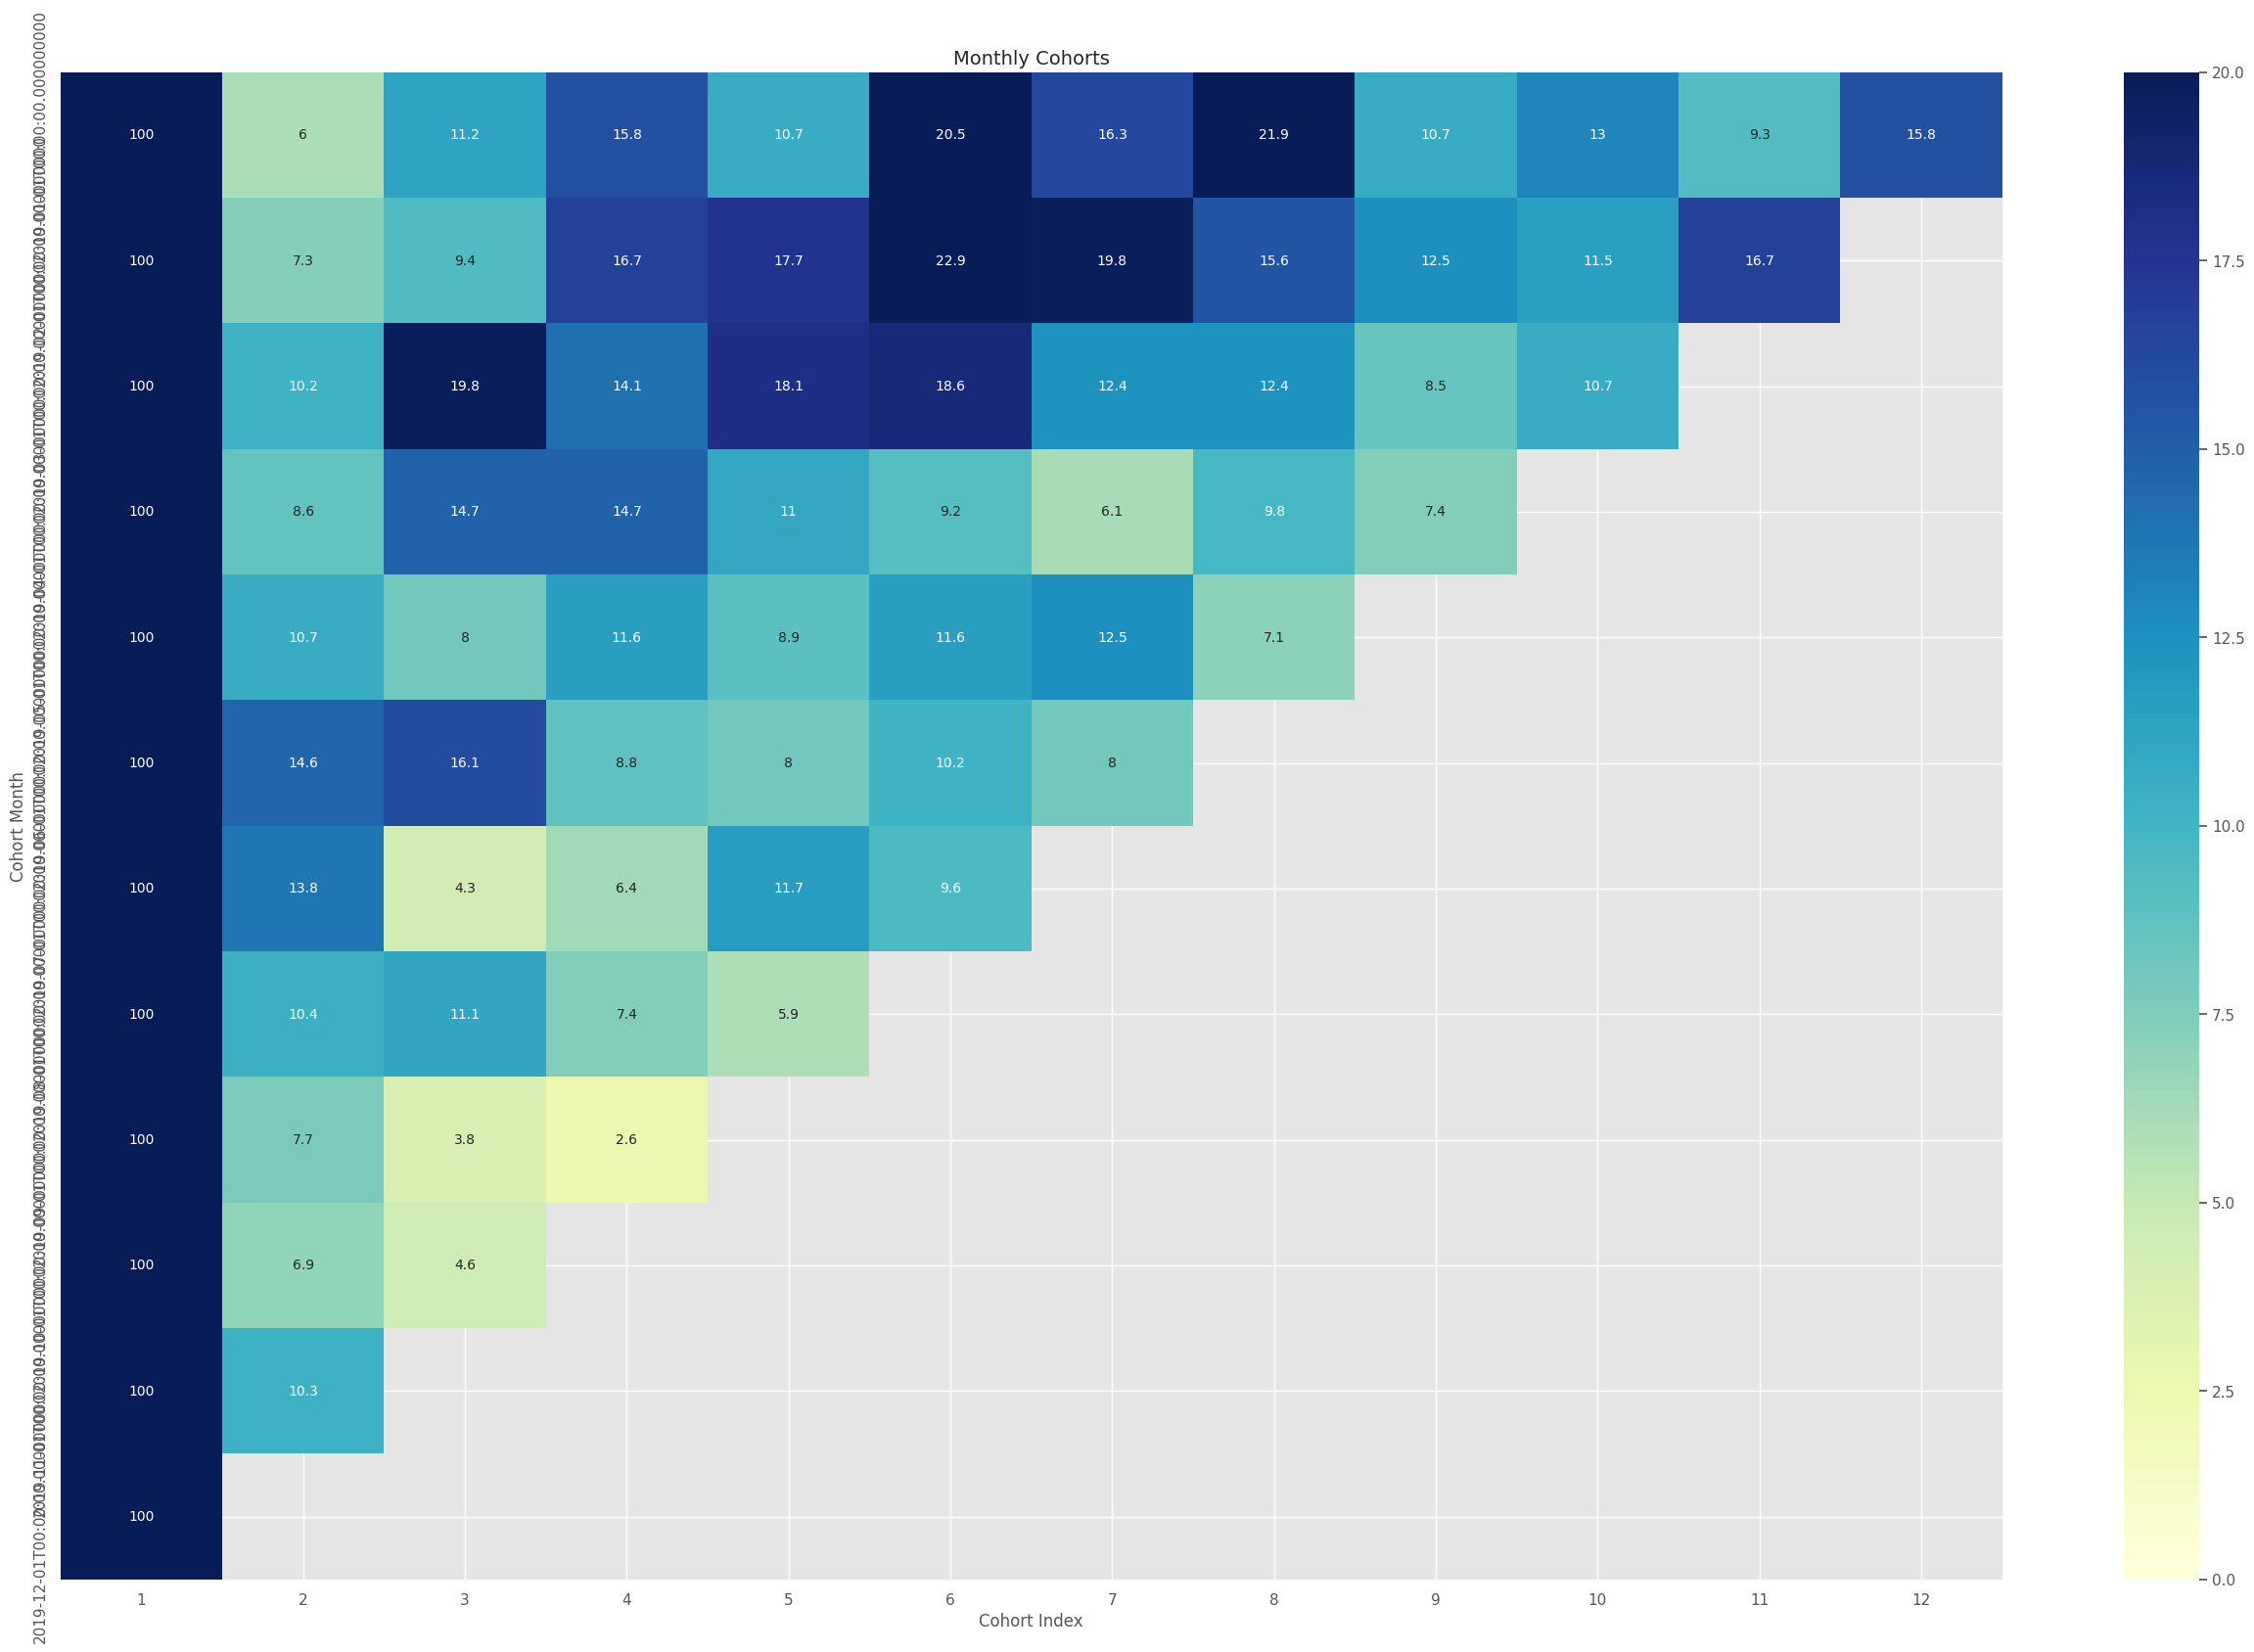

In [ ]:
# Initialize the figure
plt.figure(figsize=(32, 20))
# Adding a title
plt.title('Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap((retention.round(3)*100), annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='vertical')
plt.show()

#Customer Live Time Value Analysis

Customer Lifetime Value (CLV or LTV) is a crucial business metric that represents the total net profit a company can expect to generate from a single customer over the entire duration of their relationship. Instead of focusing on a single purchase, CLV provides a long-term perspective on the value of each customer.

In [ ]:
df_trans.head(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Total_Price,Gender,Location,Tenure_Months,Offline_Spend,Online_Spend,Year_Month,Customer_Type,CohortMonth,CohortIndex
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,158.67,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,8.53,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,109.93,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,24.02,M,Chicago,12,4500,2424.5,2019-01,new_cust,2019-01-01,1


In [ ]:
def get_month_int(dframe, column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    return year, month

# Get the integers for date parts from the Transaction date column
transcation_year, transaction_month = get_month_int(df_trans, 'Transaction_Date')

# Getting the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_month_int(df_trans, 'CohortMonth')

#  Get the  difference in years
years_diff = transcation_year - cohort_year

# Calculate difference in months
months_diff = transaction_month - cohort_month

#Extract the difference in months from all previous values
df_trans['Cohort_period'] = years_diff * 12 + months_diff

# Grouping by customer_id and select the CohortMonth
grouping_clv = df_trans.groupby('CustomerID')['CohortMonth']

# Assigning a minimum CohortMonth to the dataset to get the actual first purchase month
df_trans['Cohort_month'] = grouping_clv.transform('min').dt.month


def cohort_clv(df):
    CohortMonth = []
    period = []
    average_total_sales = []
    frequency = []
    for n in range(1, 13):
        CohortMonth.append(n)
        month_df = df.loc[df["Cohort_month"] == n]
        if not month_df.empty and not month_df.groupby("Cohort_month")["Total_Price"].mean().empty:
            average_total_sales.append(month_df.groupby("Cohort_month")["Total_Price"].mean().reset_index()["Total_Price"].values[0])
        else:
             average_total_sales.append(0)

        # Calculate average transaction frequency per customer in the cohort
        if not month_df.empty:
          customer_frequencies = month_df.groupby("CustomerID")["Transaction_ID"].nunique().reset_index()
          if not customer_frequencies.empty:
            frequency.append(round(customer_frequencies["Transaction_ID"].mean(), 0))
          else:
            frequency.append(0)
        else:
            frequency.append(0)

        # Calculate average lifetime for customers in the cohort
        if not month_df.empty:
            max_period = month_df.groupby("CustomerID")["Cohort_period"].transform("max").reset_index()
            if not max_period.empty:
                period.append(round(max_period["Cohort_period"].mean(), 0))
            else:
                period.append(0)
        else:
             period.append(0)


    return CohortMonth, period, average_total_sales, frequency

month, period, average_sales, frequency = cohort_clv(df_trans)

month_sales_frequency_df = pd.DataFrame(zip(month, period, average_sales, frequency), columns=["Cohort_Month", "Average_lifetime", "Average_purchase_value", "Frequency"])

# CLV = customer value x average lifetime
month_sales_frequency_df["customer_value"] = round((month_sales_frequency_df['Average_purchase_value'] * month_sales_frequency_df["Frequency"]), 2)
month_sales_frequency_df["clv"] = round((month_sales_frequency_df["customer_value"] * month_sales_frequency_df["Average_lifetime"]), 2)

month_sales_frequency_df.sort_values(by="clv", ascending=False)

styled_clv = month_sales_frequency_df.style.background_gradient(subset=['Average_purchase_value','Frequency','customer_value','clv'], cmap='Blues')
styled_clv


,Cohort_Month,Average_lifetime,Average_purchase_value,Frequency,customer_value,clv
0,1,7.000000,112.224458,26.000000,2917.840000,20424.880000
1,2,6.000000,102.361284,32.000000,3275.560000,19653.360000
2,3,5.000000,100.313832,21.000000,2106.590000,10532.950000
3,4,4.000000,104.379687,15.000000,1565.700000,6262.800000
4,5,3.000000,85.108246,20.000000,1702.160000,5106.480000
5,6,2.000000,88.620264,14.000000,1240.680000,2481.360000
6,7,2.000000,93.100020,15.000000,1396.500000,2793.000000
7,8,1.000000,81.869363,12.000000,982.430000,982.430000
8,9,0.000000,88.804886,12.000000,1065.660000,0.000000
9,10,0.000000,121.720786,14.000000,1704.090000,0.000000


Based on the table above, it is recommended to implement targeted campaigns—such as discounts and cash backs—for customers who joined in January and February. This cohort has generated a significantly higher amount of revenue over time compared to other months. Additionally, engaging these customers may further extend their average lifespan, resulting in increased revenue potential.